<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Phân tích dữ liệu điểm thi THPTQG 2022 và 2023<Title>
</div>

### Import thư viện

In [40]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp

warnings.filterwarnings("ignore")

### Đường dẫn

In [41]:
path_raw_2022='./raw/2022.csv'
path_raw_2023='./raw/2023.csv'
path_processed='./processed_vi'
path_img='./img'

### Đọc dữ liệu

In [42]:
df_2022=pd.read_csv(path_raw_2022)
print(df_2022.shape)
print(df_2022.dtypes)
df_2022.head()

(995441, 10)
sbd            int64
toan         float64
ngu_van      float64
ngoai_ngu    float64
vat_li       float64
hoa_hoc      float64
sinh_hoc     float64
lich_su      float64
dia_li       float64
gdcd         float64
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [43]:
df_2023=pd.read_csv(path_raw_2023)
print(df_2023.shape)
print(df_2023.dtypes)
df_2023.head()

(1022060, 11)
sbd               int64
toan            float64
ngu_van         float64
ngoai_ngu       float64
vat_li          float64
hoa_hoc         float64
sinh_hoc        float64
lich_su         float64
dia_li          float64
gdcd            float64
ma_ngoai_ngu     object
dtype: object


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


Xóa `ma_ngoai_ngu`

In [44]:
df_2023.drop(columns=['ma_ngoai_ngu'], inplace=True)
df_2023.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25


Tính điểm cho `KHTN` và `KHXH`

In [45]:
def calculate_khtn_khxh(df):
    df['khtn'] = (df['vat_li'] + df['hoa_hoc'] + df['sinh_hoc']) / 3
    df['khxh'] = (df['lich_su'] + df['dia_li'] + df['gdcd']) / 4
    return df

df_2022 = calculate_khtn_khxh(df_2022)
df_2023 = calculate_khtn_khxh(df_2023)

### Thống kê cơ bản về dữ liệu

In [46]:
stats_2022 = df_2022.describe()
stats_2022

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh
count,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000,318685.000000,554090.000000
mean,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266,6.137008,5.316188
std,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272,1.102178,0.815158
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812500
25%,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000,5.416667,4.812500
50%,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000,6.250000,5.375000
75%,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000,6.916667,5.875000
max,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.666667,7.500000


In [47]:
stats_2023=df_2023.describe()
stats_2023

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh
count,1.022060e+06,1.003373e+06,1.008239e+06,880997.000000,327189.000000,328118.000000,324625.000000,683447.000000,682134.000000,565452.000000,322540.000000,565243.000000
mean,2.753863e+07,6.250557e+00,6.858194e+00,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805,6.568933,5.162781
std,1.915578e+07,1.633336e+00,1.326471e+00,1.966353,1.486819,1.428468,1.206772,1.552931,1.168732,1.137638,1.015150,0.806083
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.166667,0.000000
25%,1.000129e+07,5.200000e+00,6.000000e+00,4.000000,5.500000,5.750000,5.500000,5.000000,5.500000,7.750000,5.916667,4.625000
50%,2.801558e+07,6.600000e+00,7.000000e+00,5.200000,6.750000,7.000000,6.500000,6.000000,6.250000,8.500000,6.666667,5.187500
75%,4.400621e+07,7.600000e+00,7.750000e+00,7.000000,7.750000,7.750000,7.250000,7.250000,7.000000,9.250000,7.333333,5.750000
max,6.400694e+07,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.666667,7.500000


In [48]:
# Chuyển đổi dữ liệu sang định dạng long format
stats_2022_long = stats_2022.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()
stats_2023_long = stats_2023.melt(var_name='Subject', value_name='Value', ignore_index=False).reset_index()

# Thêm cột Year để chỉ ra năm tương ứng
stats_2022_long['Year'] = 2022
stats_2023_long['Year'] = 2023

# Gộp dữ liệu của hai năm
stats_combined_long = pd.concat([stats_2022_long, stats_2023_long], axis=0)

# Sắp xếp lại các cột
stats_combined_long = stats_combined_long[['Year', 'index', 'Subject', 'Value']]

# Đổi tên cột cho dễ hiểu
stats_combined_long.columns = ['Year', 'Statistic', 'Subject', 'Value']

# Đổi tên cột sang tiếng Việt
stats_combined_long.columns = ['Năm', 'Thông tin thống kê', 'Môn', 'Giá trị']

# Lưu kết quả vào file XLXS
stats_combined_long.to_excel(f'{path_processed}/stats_combined_long.xlsx', index=False, engine='openpyxl', sheet_name='Thống kê mô tả môn thi')

In [49]:
# Danh sách các môn học
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'khtn', 'khxh']

# Tạo map cho tên môn học tiếng Việt có dấu
subject_map = {
    'toan': 'Toán',
    'ngu_van': 'Ngữ văn',
    'ngoai_ngu': 'Ngoại ngữ',
    'vat_li': 'Vật lí',
    'hoa_hoc': 'Hóa học',
    'sinh_hoc': 'Sinh học',
    'lich_su': 'Lịch sử',
    'dia_li': 'Địa lí',
    'gdcd': 'GDCD',
    'khtn': 'Khoa học tự nhiên',
    'khxh': 'Khoa học xã hội'
}

### Phổ điểm các môn

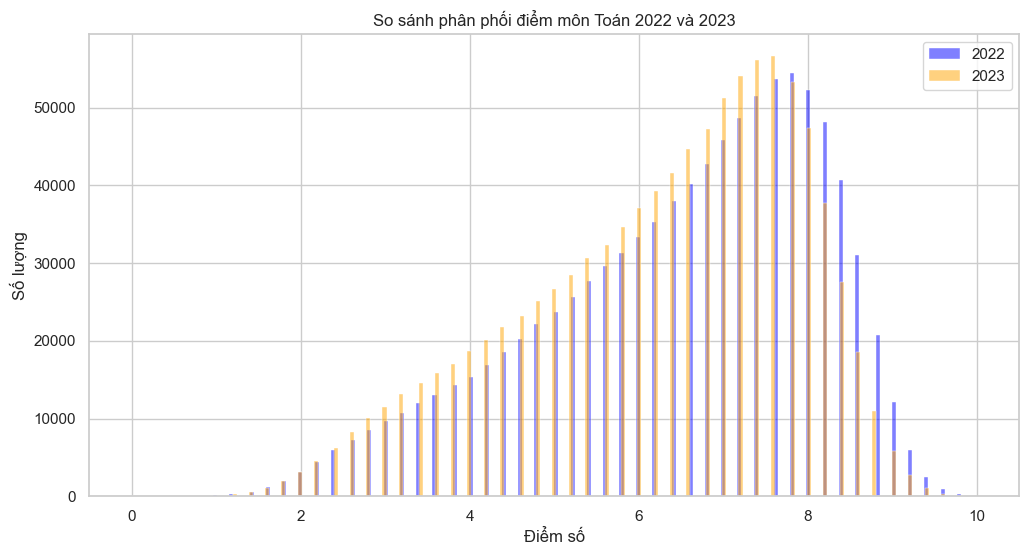

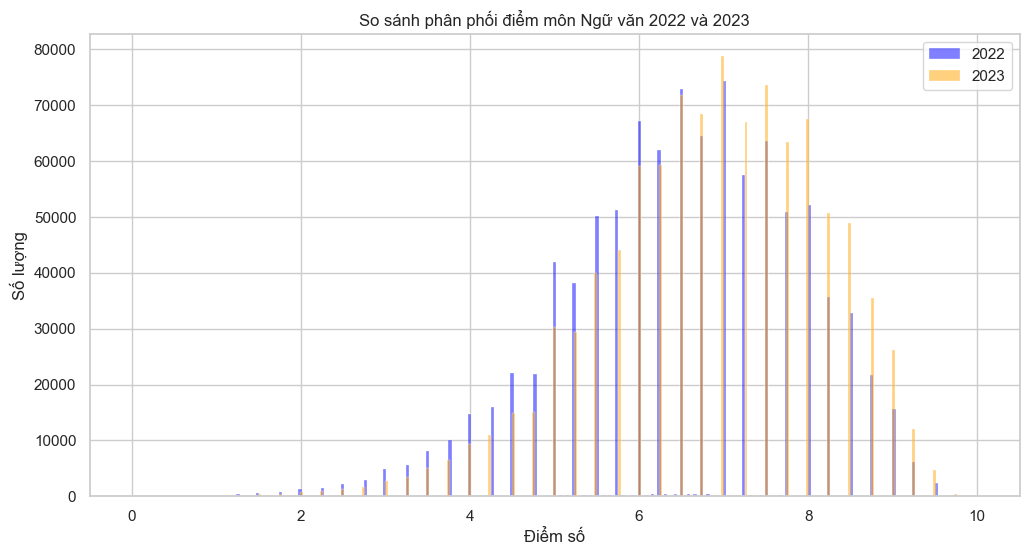

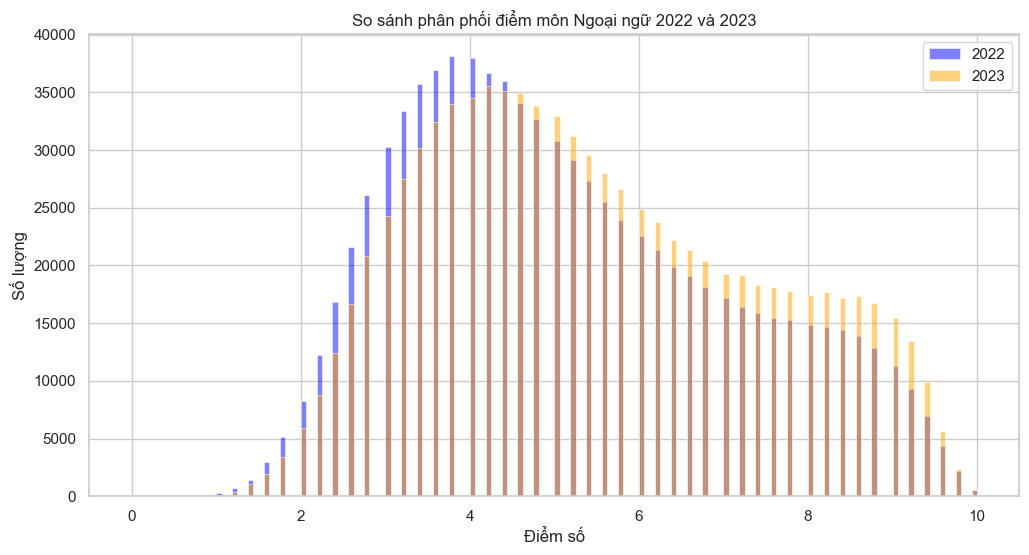

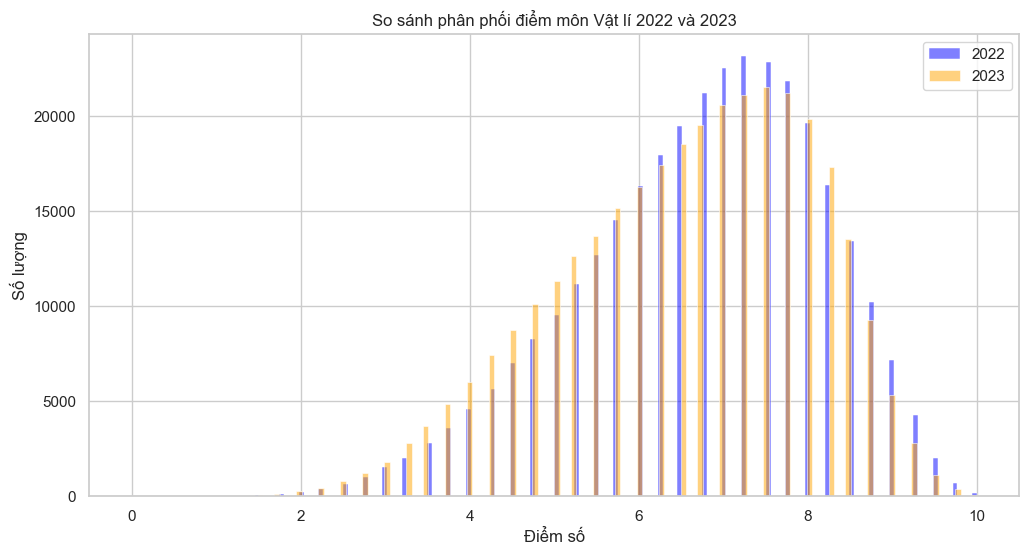

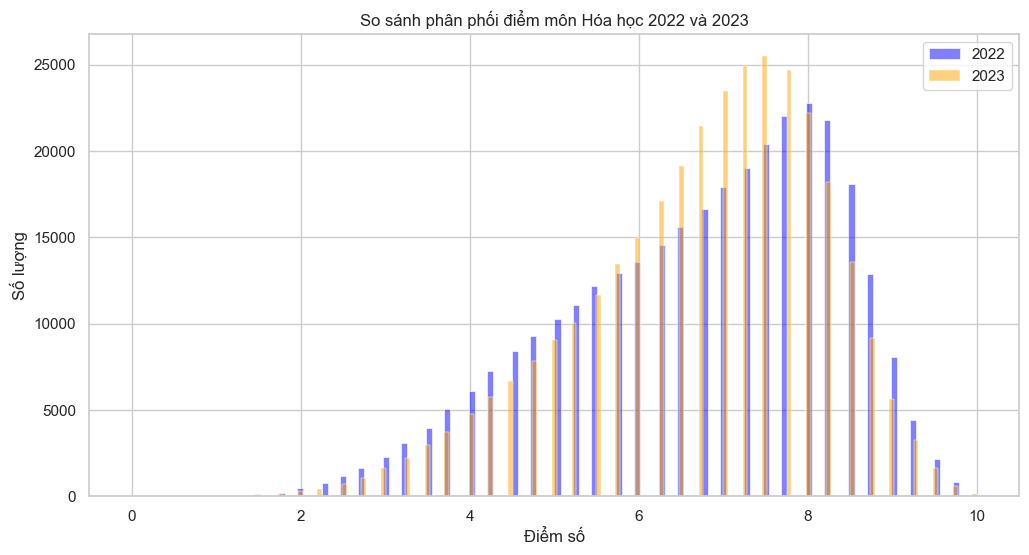

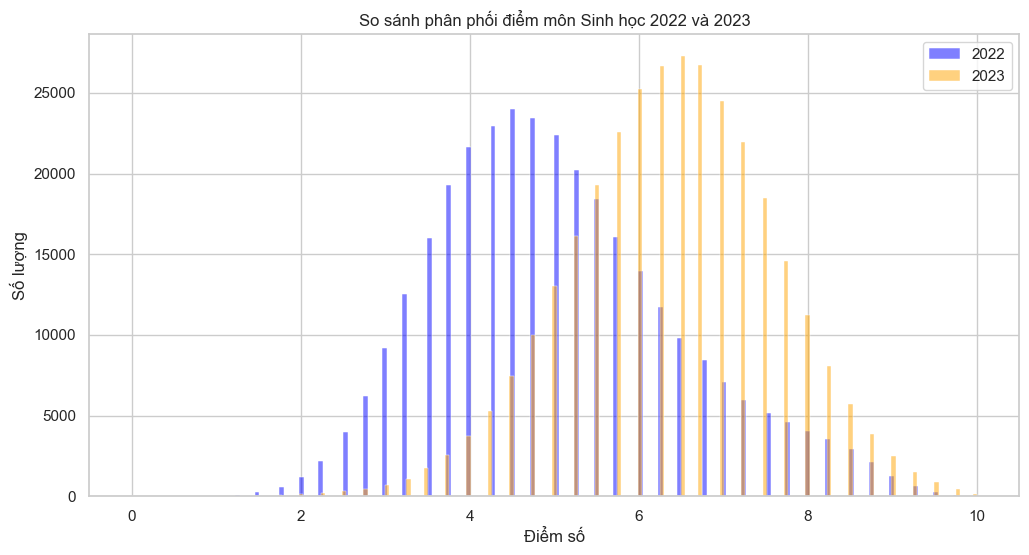

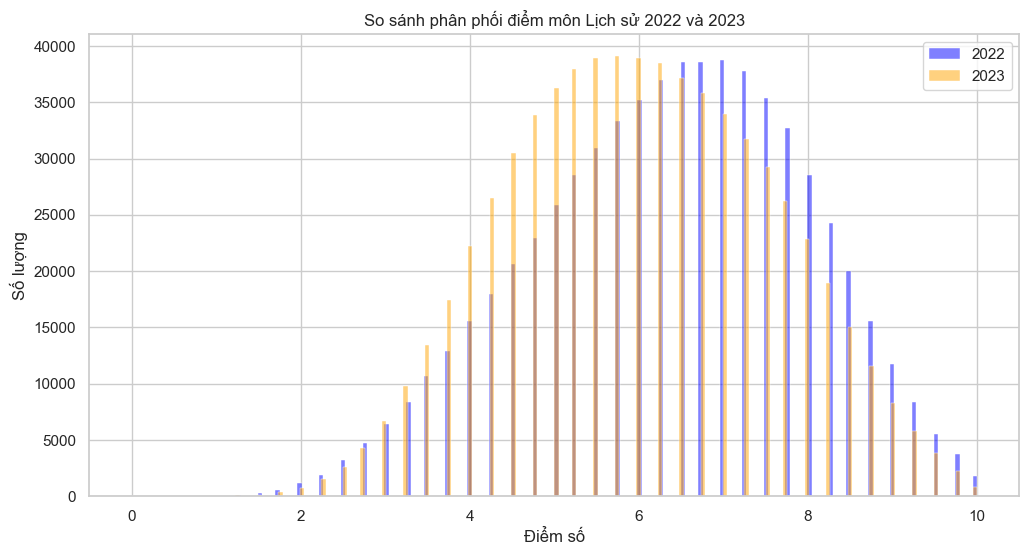

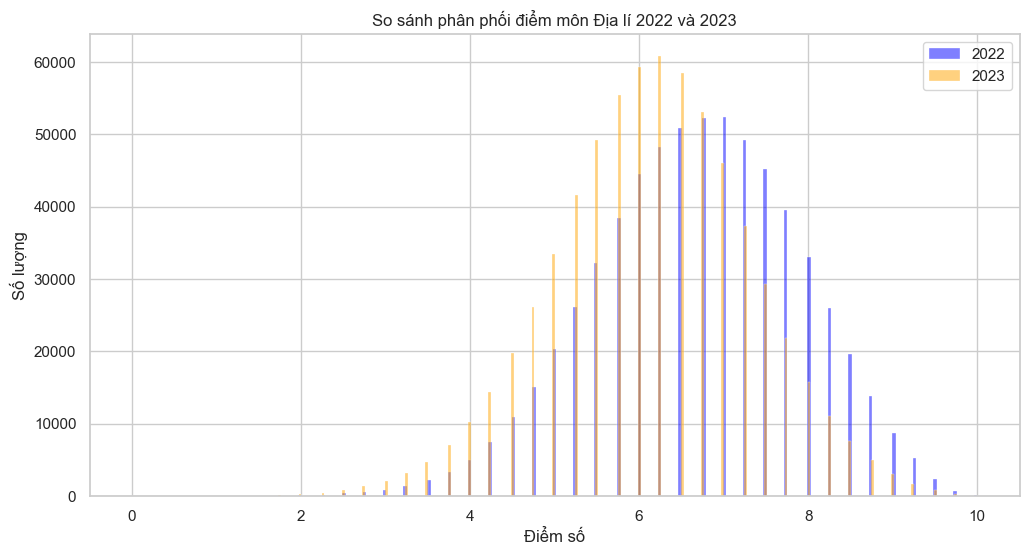

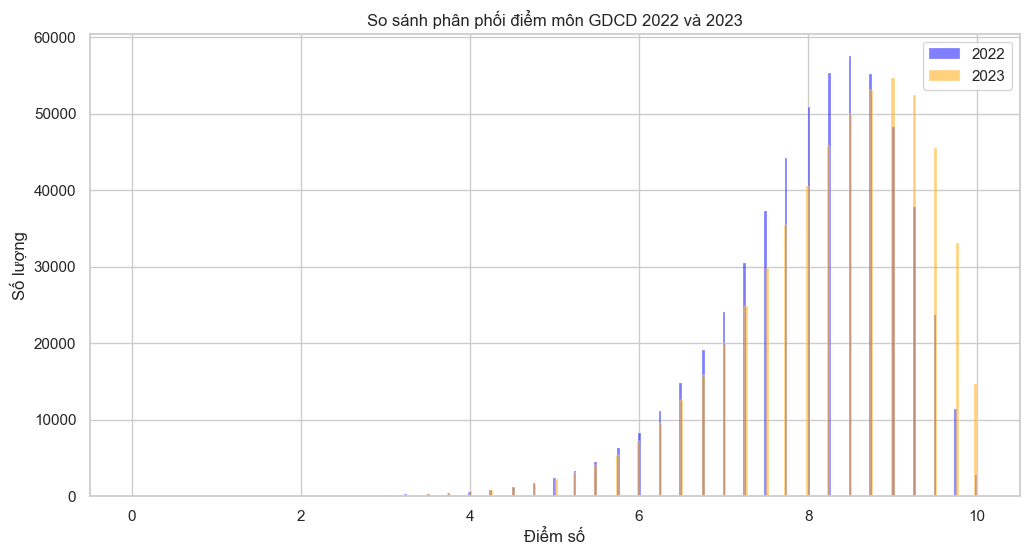

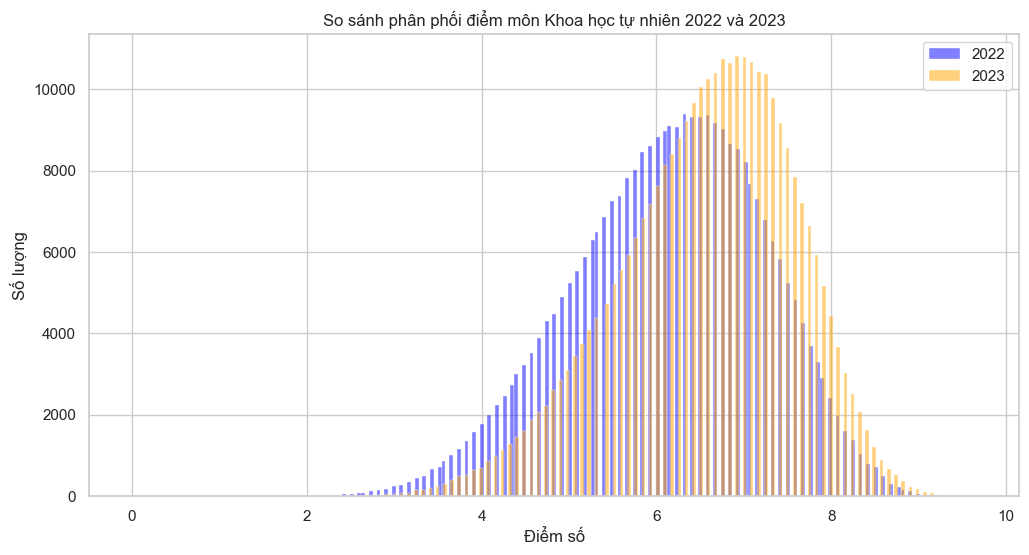

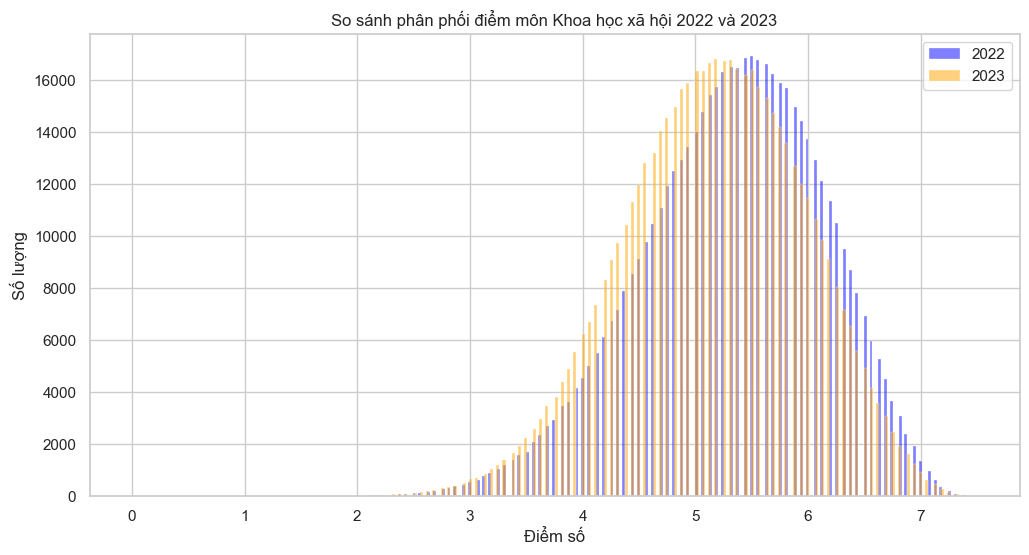

In [50]:
# Vẽ biểu đồ phân phối điểm cho từng môn với màu sắc và độ trong suốt khác nhau
sns.set_theme(style="whitegrid")

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[subject], color='blue', label='2022', stat="count", alpha=0.5)
    sns.histplot(df_2023[subject], color='orange', label='2023', stat="count", alpha=0.5)
    plt.title(f'So sánh phân phối điểm môn {subject_map[subject]} 2022 và 2023')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{subject}.png')
    plt.show()

In [51]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2022_ngu_van = df_2022[df_2022['ngu_van'] % 0.25 != 0]
df_2022_ngu_van = df_2022_ngu_van[~df_2022_ngu_van['ngu_van'].isnull()]
df_2022_ngu_van.shape
df_2022_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh
186,1000190,5.4,5.17,NaN,NaN,NaN,NaN,7.50,5.50,7.50,NaN,5.1250
279,1000283,7.8,6.67,4.0,NaN,NaN,NaN,4.75,6.75,7.00,NaN,4.6250
502,1000515,NaN,4.67,NaN,NaN,NaN,NaN,9.00,6.50,NaN,NaN,NaN
631,1000647,6.2,6.83,7.0,NaN,NaN,NaN,6.00,6.50,7.50,NaN,5.0000
661,1000677,7.4,6.67,8.4,NaN,NaN,NaN,7.25,8.25,7.75,NaN,5.8125


In [52]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2023_ngu_van = df_2023[df_2023['ngu_van'] % 0.25 != 0]
df_2023_ngu_van = df_2023_ngu_van[~df_2023_ngu_van['ngu_van'].isnull()]
df_2023_ngu_van.shape
df_2023_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh
3697,1003698,3.8,6.16,NaN,NaN,NaN,NaN,7.25,5.50,NaN,NaN,NaN
3718,1003719,NaN,6.16,NaN,NaN,NaN,NaN,6.00,7.25,NaN,NaN,NaN
3773,1003774,8.0,5.42,7.4,8.75,4.25,5.0,NaN,NaN,NaN,6.000000,NaN
3938,1003939,6.6,5.33,9.2,7.25,5.25,6.0,NaN,NaN,NaN,6.166667,NaN
4284,1004285,6.8,7.58,7.4,NaN,NaN,NaN,3.75,5.25,6.5,NaN,3.875


In [53]:
# Thay thế các giá trị không tròn 0.25 bằng giá trị tròn 0.25 gần nhất nếu không phải NaN
df_2022['ngu_van'] = df_2022['ngu_van'].apply(lambda x: round(x * 4) / 4 if not np.isnan(x) else x)
df_2023['ngu_van'] = df_2023['ngu_van'].apply(lambda x: round(x * 4) / 4 if not np.isnan(x) else x)

In [54]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2022_ngu_van = df_2022[df_2022['ngu_van'] % 0.25 != 0]
df_2022_ngu_van = df_2022_ngu_van[~df_2022_ngu_van['ngu_van'].isnull()]
df_2022_ngu_van.shape
df_2022_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh


In [55]:
# In ra những thí sinh có điểm môn Ngữ văn không tròn 0.25 và khác NaN
df_2023_ngu_van = df_2023[df_2023['ngu_van'] % 0.25 != 0]
df_2023_ngu_van = df_2023_ngu_van[~df_2023_ngu_van['ngu_van'].isnull()]
df_2023_ngu_van.shape
df_2023_ngu_van.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh


In [56]:
province_map = {
    '01': {'name': 'Hà Nội', 'region': 'Bắc', 'longitude': 105.8342, 'latitude': 21.0278},
    '02': {'name': 'Hồ Chí Minh', 'region': 'Nam', 'longitude': 106.6297, 'latitude': 10.8231},
    '03': {'name': 'Hải Phòng', 'region': 'Bắc', 'longitude': 106.6860, 'latitude': 20.8449},
    '04': {'name': 'Đà Nẵng', 'region': 'Trung', 'longitude': 108.2022, 'latitude': 16.0471},
    '05': {'name': 'Hà Giang', 'region': 'Bắc', 'longitude': 104.7150, 'latitude': 22.8240},
    '06': {'name': 'Cao Bằng', 'region': 'Bắc', 'longitude': 106.2522, 'latitude': 22.6657},
    '07': {'name': 'Lai Châu', 'region': 'Bắc', 'longitude': 103.2730, 'latitude': 22.3964},
    '08': {'name': 'Lào Cai', 'region': 'Bắc', 'longitude': 103.9706, 'latitude': 22.3381},
    '09': {'name': 'Tuyên Quang', 'region': 'Bắc', 'longitude': 105.2352, 'latitude': 21.8238},
    '10': {'name': 'Lạng Sơn', 'region': 'Bắc', 'longitude': 106.7504, 'latitude': 21.8450},
    '11': {'name': 'Bắc Kạn', 'region': 'Bắc', 'longitude': 105.8391, 'latitude': 22.1460},
    '12': {'name': 'Thái Nguyên', 'region': 'Bắc', 'longitude': 105.8526, 'latitude': 21.5928},
    '13': {'name': 'Yên Bái', 'region': 'Bắc', 'longitude': 104.7116, 'latitude': 21.7270},
    '14': {'name': 'Sơn La', 'region': 'Bắc', 'longitude': 103.7289, 'latitude': 21.3280},
    '15': {'name': 'Phú Thọ', 'region': 'Bắc', 'longitude': 105.2253, 'latitude': 21.2684},
    '16': {'name': 'Vĩnh Phúc', 'region': 'Bắc', 'longitude': 105.6038, 'latitude': 21.3089},
    '17': {'name': 'Quảng Ninh', 'region': 'Bắc', 'longitude': 107.0829, 'latitude': 21.0064},
    '18': {'name': 'Bắc Giang', 'region': 'Bắc', 'longitude': 106.1990, 'latitude': 21.2730},
    '19': {'name': 'Bắc Ninh', 'region': 'Bắc', 'longitude': 106.0783, 'latitude': 21.1861},
    '21': {'name': 'Hải Dương', 'region': 'Bắc', 'longitude': 106.3330, 'latitude': 20.9403},
    '22': {'name': 'Hưng Yên', 'region': 'Bắc', 'longitude': 106.0511, 'latitude': 20.6463},
    '23': {'name': 'Hòa Bình', 'region': 'Bắc', 'longitude': 105.3385, 'latitude': 20.6861},
    '24': {'name': 'Hà Nam', 'region': 'Bắc', 'longitude': 106.0160, 'latitude': 20.5835},
    '25': {'name': 'Nam Định', 'region': 'Bắc', 'longitude': 106.1621, 'latitude': 20.4200},
    '26': {'name': 'Thái Bình', 'region': 'Bắc', 'longitude': 106.3350, 'latitude': 20.4461},
    '27': {'name': 'Ninh Bình', 'region': 'Bắc', 'longitude': 105.9740, 'latitude': 20.2515},
    '28': {'name': 'Thanh Hóa', 'region': 'Trung', 'longitude': 105.7769, 'latitude': 19.8067},
    '29': {'name': 'Nghệ An', 'region': 'Trung', 'longitude': 105.6930, 'latitude': 19.2343},
    '30': {'name': 'Hà Tĩnh', 'region': 'Trung', 'longitude': 105.9063, 'latitude': 18.3535},
    '31': {'name': 'Quảng Bình', 'region': 'Trung', 'longitude': 106.6291, 'latitude': 17.4685},
    '32': {'name': 'Quảng Trị', 'region': 'Trung', 'longitude': 107.2022, 'latitude': 16.7403},
    '33': {'name': 'Thừa Thiên Huế', 'region': 'Trung', 'longitude': 107.5787, 'latitude': 16.4637},
    '34': {'name': 'Quảng Nam', 'region': 'Trung', 'longitude': 108.1094, 'latitude': 15.5394},
    '35': {'name': 'Quảng Ngãi', 'region': 'Trung', 'longitude': 108.8036, 'latitude': 15.1205},
    '36': {'name': 'Kon Tum', 'region': 'Trung', 'longitude': 107.9880, 'latitude': 14.3500},
    '37': {'name': 'Bình Định', 'region': 'Trung', 'longitude': 109.1863, 'latitude': 13.7821},
    '38': {'name': 'Gia Lai', 'region': 'Trung', 'longitude': 108.0360, 'latitude': 13.9653},
    '39': {'name': 'Phú Yên', 'region': 'Trung', 'longitude': 109.3088, 'latitude': 13.0882},
    '40': {'name': 'Đắk Lắk', 'region': 'Trung', 'longitude': 108.0838, 'latitude': 12.7100},
    '41': {'name': 'Khánh Hòa', 'region': 'Trung', 'longitude': 109.1927, 'latitude': 12.2388},
    '42': {'name': 'Lâm Đồng', 'region': 'Trung', 'longitude': 108.4428, 'latitude': 11.9416},
    '43': {'name': 'Bình Phước', 'region': 'Nam', 'longitude': 106.9228, 'latitude': 11.7504},
    '44': {'name': 'Bình Dương', 'region': 'Nam', 'longitude': 106.6520, 'latitude': 11.0868},
    '45': {'name': 'Ninh Thuận', 'region': 'Trung', 'longitude': 108.9800, 'latitude': 11.5650},
    '46': {'name': 'Tây Ninh', 'region': 'Nam', 'longitude': 106.1257, 'latitude': 11.3545},
    '47': {'name': 'Bình Thuận', 'region': 'Trung', 'longitude': 108.0969, 'latitude': 11.0903},
    '48': {'name': 'Đồng Nai', 'region': 'Nam', 'longitude': 107.1689, 'latitude': 10.9447},
    '49': {'name': 'Long An', 'region': 'Nam', 'longitude': 106.1237, 'latitude': 10.5359},
    '50': {'name': 'Đồng Tháp', 'region': 'Nam', 'longitude': 105.7415, 'latitude': 10.4720},
    '51': {'name': 'An Giang', 'region': 'Nam', 'longitude': 105.4306, 'latitude': 10.5200},
    '52': {'name': 'Bà Rịa Vũng Tàu', 'region': 'Nam', 'longitude': 107.0843, 'latitude': 10.5417},
    '53': {'name': 'Tiền Giang', 'region': 'Nam', 'longitude': 106.3637, 'latitude': 10.3755},
    '54': {'name': 'Kiên Giang', 'region': 'Nam', 'longitude': 105.0848, 'latitude': 10.0121},
    '55': {'name': 'Cần Thơ', 'region': 'Nam', 'longitude': 105.7209, 'latitude': 10.0452},
    '56': {'name': 'Bến Tre', 'region': 'Nam', 'longitude': 106.3771, 'latitude': 10.2433},
    '57': {'name': 'Vĩnh Long', 'region': 'Nam', 'longitude': 106.0055, 'latitude': 10.2537},
    '58': {'name': 'Trà Vinh', 'region': 'Nam', 'longitude': 106.3449, 'latitude': 9.9377},
    '59': {'name': 'Sóc Trăng', 'region': 'Nam', 'longitude': 105.9803, 'latitude': 9.6035},
    '60': {'name': 'Bạc Liêu', 'region': 'Nam', 'longitude': 105.7245, 'latitude': 9.2763},
    '61': {'name': 'Cà Mau', 'region': 'Nam', 'longitude': 105.1500, 'latitude': 9.1769},
    '62': {'name': 'Điện Biên', 'region': 'Bắc', 'longitude': 103.0235, 'latitude': 21.3860},
    '63': {'name': 'Đắk Nông', 'region': 'Trung', 'longitude': 107.7148, 'latitude': 12.1888},
    '64': {'name': 'Hậu Giang', 'region': 'Nam', 'longitude': 105.5552, 'latitude': 9.7849}
}


In [57]:
# Thêm cột 'Province' vào dataframe dựa trên sbd
def add_province_column(df):
    df['sbd'] = df['sbd'].astype(str).str.zfill(8)  # Đảm bảo cột 'sbd' là chuỗi và có độ dài 8 ký tự
    df['Province'] = df['sbd'].str[:2].map(province_map).apply(lambda x: x['name'])
    df['Region'] = df['sbd'].str[:2].map(province_map).apply(lambda x: x['region'])
    df['Longitude'] = df['sbd'].str[:2].map(province_map).apply(lambda x: x['longitude'])
    df['Latitude'] = df['sbd'].str[:2].map(province_map).apply(lambda x: x['latitude'])
    return df

# Cập nhật dataframe
df_2022 = add_province_column(df_2022)
df_2023 = add_province_column(df_2023)

In [58]:
df_2022.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,khtn,khxh,Province,Region,Longitude,Latitude
0,01000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,NaN,4.3750,Hà Nội,Bắc,105.8342,21.0278
1,01000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,NaN,6.0625,Hà Nội,Bắc,105.8342,21.0278
2,01000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,NaN,5.3750,Hà Nội,Bắc,105.8342,21.0278
3,01000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,NaN,5.3750,Hà Nội,Bắc,105.8342,21.0278
4,01000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,NaN,6.1875,Hà Nội,Bắc,105.8342,21.0278


In [59]:
# Hàm để tính tần suất xuất hiện của từng điểm số theo từng tỉnh thành
def calculate_frequency(df, year):
    freq_df_list = []
    for subject in subjects:
        for province_code, province_info in province_map.items():
            province_df = df[df['Province'] == province_info['name']]
            freq = province_df[subject].value_counts().reset_index()
            freq.columns = ['Score', 'Frequency']
            freq['Year'] = year
            freq['Subject'] = subject_map[subject]
            freq['Province'] = province_info['name']
            freq['Region'] = province_info['region']
            freq['Longitude'] = province_info['longitude']
            freq['Latitude'] = province_info['latitude']
            freq_df_list.append(freq)
    return pd.concat(freq_df_list)

# Tính tần suất xuất hiện của từng điểm số cho mỗi môn thi theo từng tỉnh thành
freq_2022 = calculate_frequency(df_2022, 2022)
freq_2023 = calculate_frequency(df_2023, 2023)

# Gộp dữ liệu của hai năm
freq_combined = pd.concat([freq_2022, freq_2023])

# Sắp xếp lại các cột
freq_combined = freq_combined[['Year', 'Region', 'Province', 'Subject', 'Score', 'Frequency', 'Longitude', 'Latitude']]

# Sắp xếp dữ liệu theo năm, tỉnh thành và môn thi
freq_combined = freq_combined.sort_values(by=['Year', 'Region', 'Province', 'Subject', 'Score'], ascending=[True, True, True, True, True])

# Đổi tên cột sang tiếng Việt
freq_combined.columns = ['Năm', 'Khu vực', 'Tỉnh/Thành phố', 'Môn', 'Điểm', 'Tần số', 'Kinh độ', 'Vĩ độ']

# Lưu kết quả vào file XLSX
freq_combined.to_excel(path_processed + '/score_frequencies.xlsx', index=False, engine='openpyxl', sheet_name='Tần số điểm theo môn')


In [60]:
freq_combined.head()

,Năm,Khu vực,Tỉnh/Thành phố,Môn,Điểm,Tần số,Kinh độ,Vĩ độ
30,2022,Bắc,Bắc Giang,GDCD,1.50,1,106.199,21.273
27,2022,Bắc,Bắc Giang,GDCD,2.25,1,106.199,21.273
31,2022,Bắc,Bắc Giang,GDCD,2.75,1,106.199,21.273
28,2022,Bắc,Bắc Giang,GDCD,3.00,1,106.199,21.273
26,2022,Bắc,Bắc Giang,GDCD,3.25,3,106.199,21.273


### Phổ điểm các tổ hợp môn

In [61]:
# Định nghĩa các tổ hợp môn thi
combinations = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'A16': ['toan', 'khtn', 'ngu_van'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'C00': ['ngu_van', 'lich_su', 'dia_li'],
    'C01': ['ngu_van', 'toan', 'vat_li'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
    'D07': ['toan', 'hoa_hoc', 'ngoai_ngu'],
    'D90': ['toan', 'khtn', 'ngoai_ngu'],
    'D96': ['toan', 'khxh', 'ngoai_ngu'],
}

In [62]:
# Hàm để tính tổng điểm cho từng tổ hợp môn
def calculate_combination_scores(df, combinations):
    for combo, subjects in combinations.items():
        # Loại bỏ các hàng có NaN trong các môn trong tổ hợp
        mask = df[subjects].notna().all(axis=1)
        df.loc[mask, combo] = df.loc[mask, subjects].sum(axis=1)
    return df


In [63]:
# Tính tổng điểm cho từng tổ hợp môn
df_2022 = calculate_combination_scores(df_2022, combinations)
df_2023 = calculate_combination_scores(df_2023, combinations)

In [64]:
df_2022[['sbd', 'A00', 'A01', 'A16', 'B00', 'C00', 'C01', 'D01', 'D07', 'D90', 'D96']].sample(5)

,sbd,A00,A01,A16,B00,C00,C01,D01,D07,D90,D96
981685,62006100,NaN,NaN,NaN,NaN,18.50,NaN,13.95,NaN,NaN,11.8875
581874,32000413,NaN,NaN,NaN,NaN,17.25,NaN,14.10,NaN,NaN,14.7875
250101,10003420,NaN,NaN,NaN,NaN,23.25,NaN,15.05,NaN,NaN,14.0500
566740,30013747,NaN,NaN,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN
440526,25011968,NaN,NaN,NaN,NaN,18.75,NaN,16.90,NaN,NaN,15.6500


In [65]:
df_2023[['sbd', 'A00', 'A01', 'A16', 'B00', 'C00', 'C01', 'D01', 'D07', 'D90', 'D96']].sample(5)

,sbd,A00,A01,A16,B00,C00,C01,D01,D07,D90,D96
421932,22013593,NaN,NaN,NaN,NaN,16.5,NaN,18.05,NaN,NaN,17.7375
1004160,62003107,NaN,NaN,NaN,NaN,13.5,NaN,12.70,NaN,NaN,10.3875
732346,41012111,NaN,NaN,NaN,NaN,19.5,NaN,16.85,NaN,NaN,14.7875
633163,34014489,NaN,NaN,NaN,NaN,23.5,NaN,17.50,NaN,NaN,16.1875
386050,19016369,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN


In [66]:
# Hàm để tính tần suất xuất hiện của từng tổng điểm theo từng tỉnh thành và tổ hợp môn
def calculate_frequency_combination(df, year, combinations):
    freq_df_list = []
    for combo, subjects in combinations.items():
        for province_code, province_info in province_map.items():
            province_df = df[df['Province'] == province_info['name']]
            freq = province_df[combo].value_counts().reset_index()
            freq.columns = ['Score', 'Frequency']
            freq['Year'] = year
            freq['Combination'] = combo
            freq['Province'] = province_info['name']
            freq['Region'] = province_info['region']
            freq['Longitude'] = province_info['longitude']
            freq['Latitude'] = province_info['latitude']
            freq_df_list.append(freq)
    return pd.concat(freq_df_list)

In [67]:
freq_2022_combo = calculate_frequency_combination(df_2022, 2022, combinations)
freq_2023_combo = calculate_frequency_combination(df_2023, 2023, combinations)

# Gộp dữ liệu của hai năm
freq_combined_combo = pd.concat([freq_2022_combo, freq_2023_combo])

# Sắp xếp lại các cột
freq_combined_combo = freq_combined_combo[['Year', 'Region', 'Province', 'Combination', 'Score', 'Frequency', 'Longitude', 'Latitude']]

# Sắp xếp theo năm, mã tổ hợp, tỉnh thành và điểm tăng dần
freq_combined_combo = freq_combined_combo.sort_values(by=['Year', 'Region', 'Province', 'Combination', 'Score'], ascending=[True, True, True, True, True])

# Đổi tên cột sang tiếng Việt
freq_combined_combo.columns = ['Năm', 'Khu vực', 'Tỉnh/Thành phố', 'Tổ hợp', 'Điểm', 'Tần số', 'Kinh độ', 'Vĩ độ']



In [68]:
freq_combined_combo.head()

,Năm,Khu vực,Tỉnh/Thành phố,Tổ hợp,Điểm,Tần số,Kinh độ,Vĩ độ
329,2022,Bắc,Bắc Giang,A00,6.60,1,106.199,21.273
308,2022,Bắc,Bắc Giang,A00,7.00,1,106.199,21.273
317,2022,Bắc,Bắc Giang,A00,8.05,1,106.199,21.273
327,2022,Bắc,Bắc Giang,A00,8.75,1,106.199,21.273
319,2022,Bắc,Bắc Giang,A00,9.05,1,106.199,21.273


In [69]:
# Lưu kết quả vào file XLXS
freq_combined_combo.to_excel(path_processed + '/combination_score_frequencies.xlsx', index=False, engine='openpyxl', sheet_name='Tần số điểm theo tổ hợp')

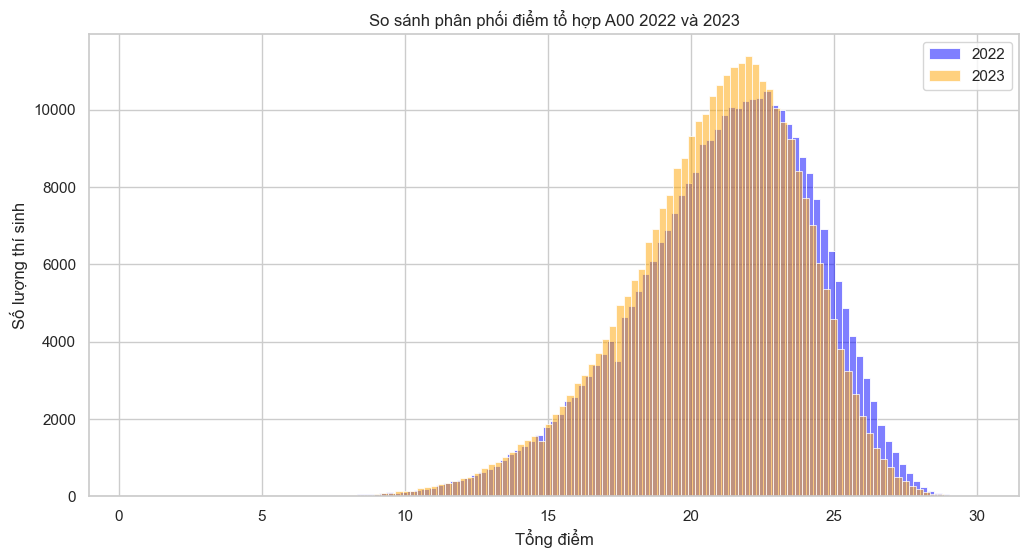

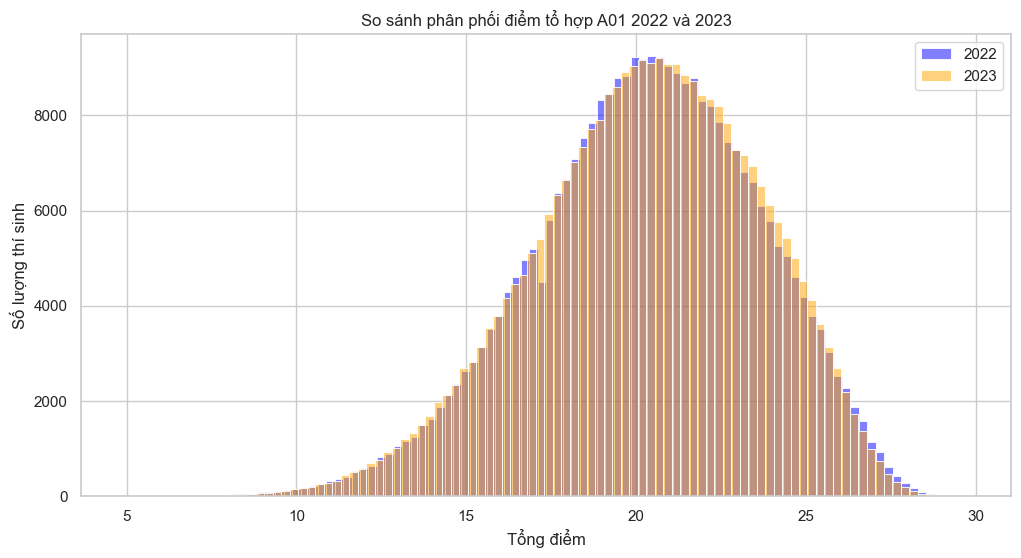

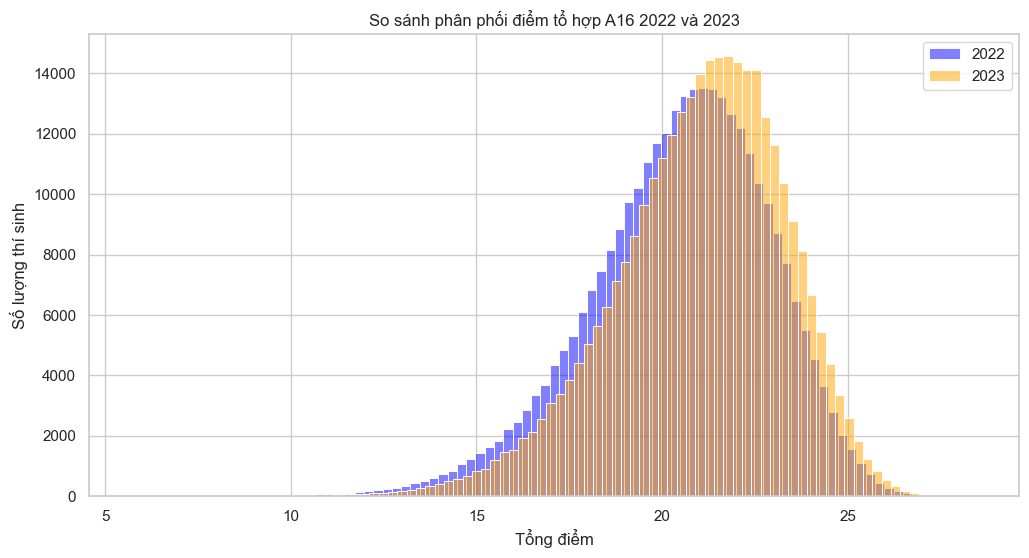

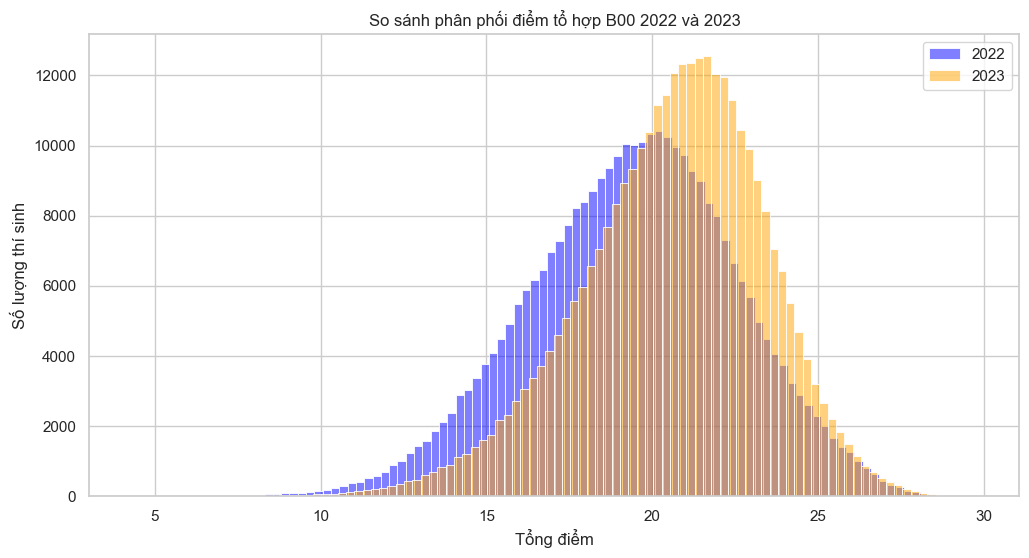

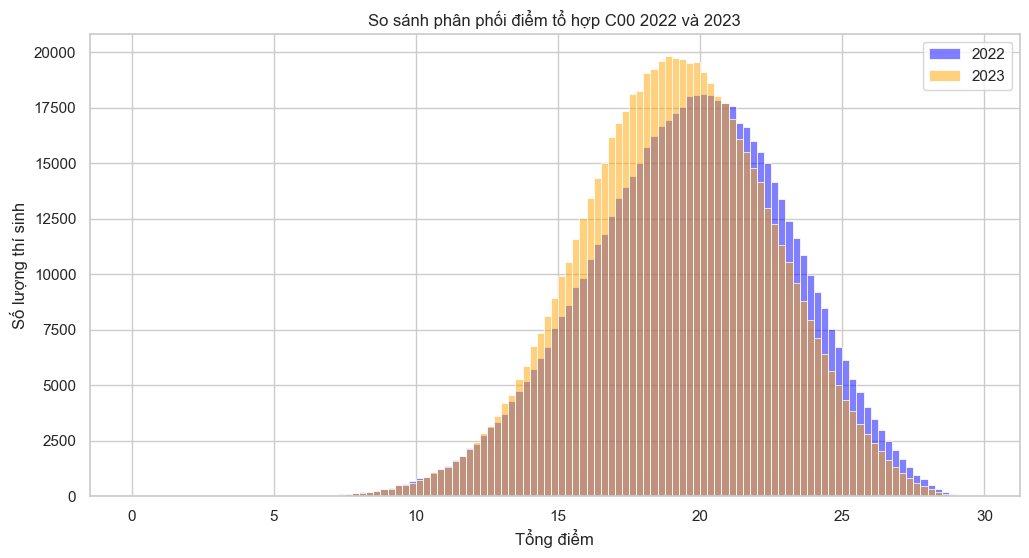

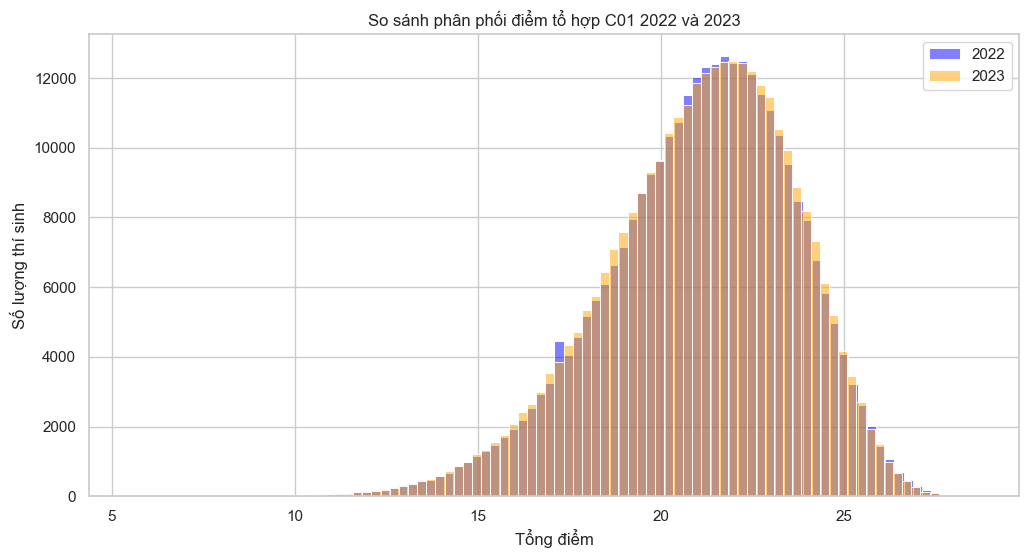

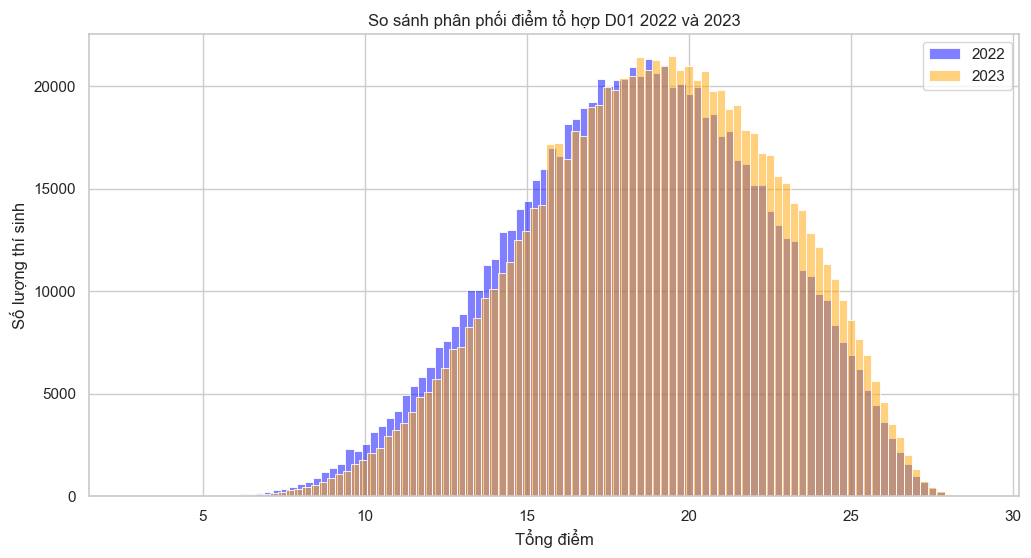

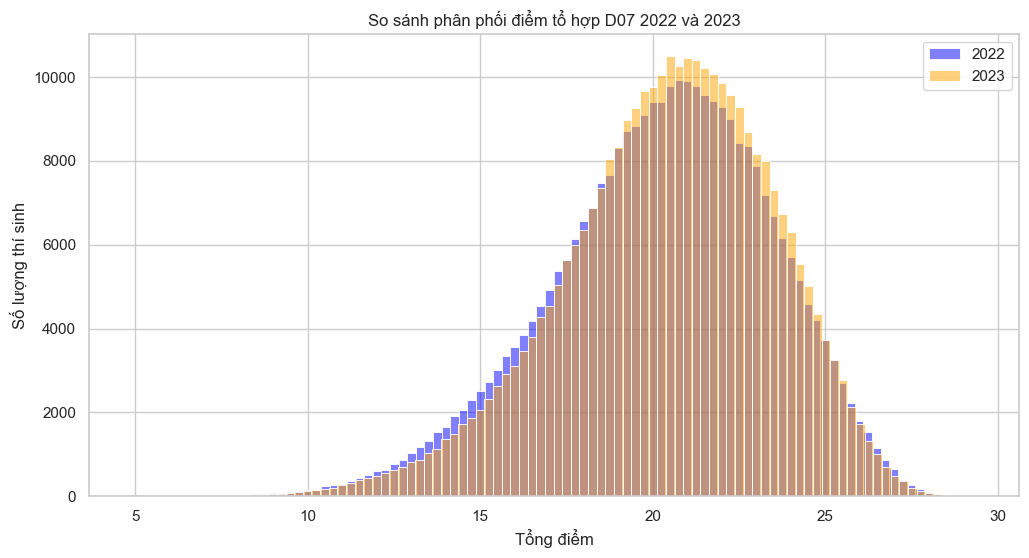

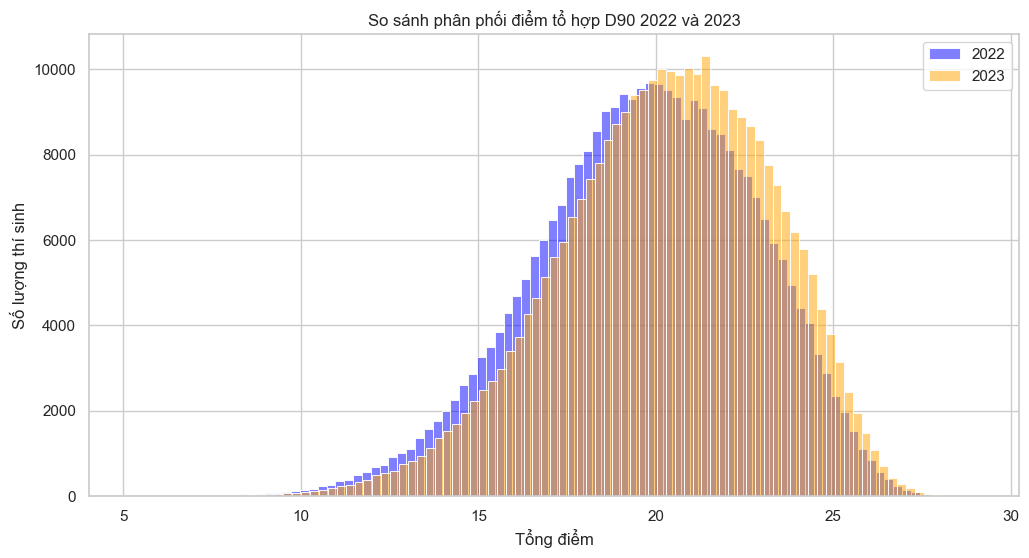

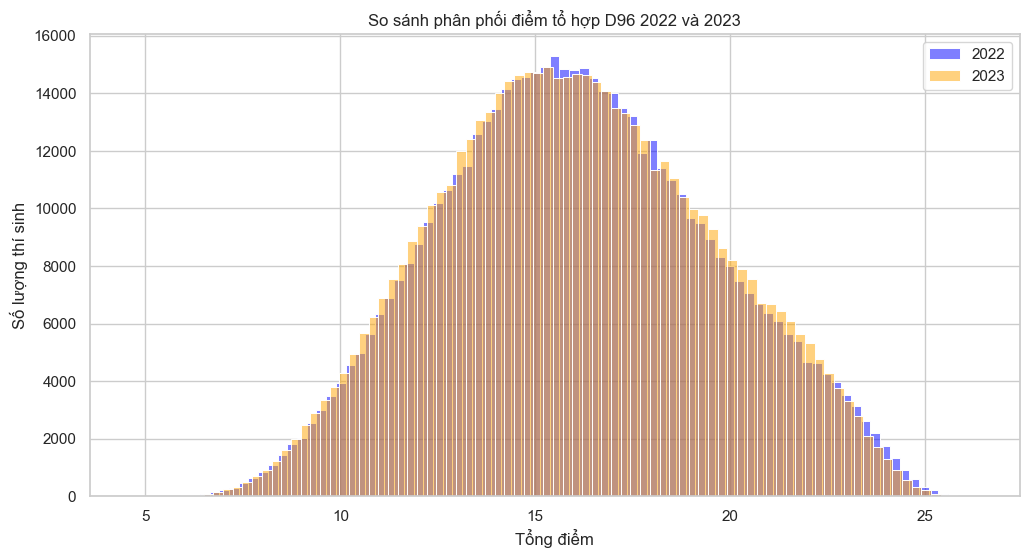

In [70]:
# Vẽ biểu đồ phân phối điểm cho từng tổ hợp môn
sns.set_theme(style="whitegrid")
for combo in combinations.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022[combo], color='blue', label='2022', stat="count", alpha=0.5, binwidth=0.25)
    sns.histplot(df_2023[combo], color='orange', label='2023', stat="count", alpha=0.5, binwidth=0.25)
    plt.title(f'So sánh phân phối điểm tổ hợp {combo} 2022 và 2023')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Số lượng thí sinh')
    plt.legend()
    plt.savefig(f'{path_img}/distribution_{combo}.png')
    plt.show()

### Phân tích tương quan giữa các môn thi

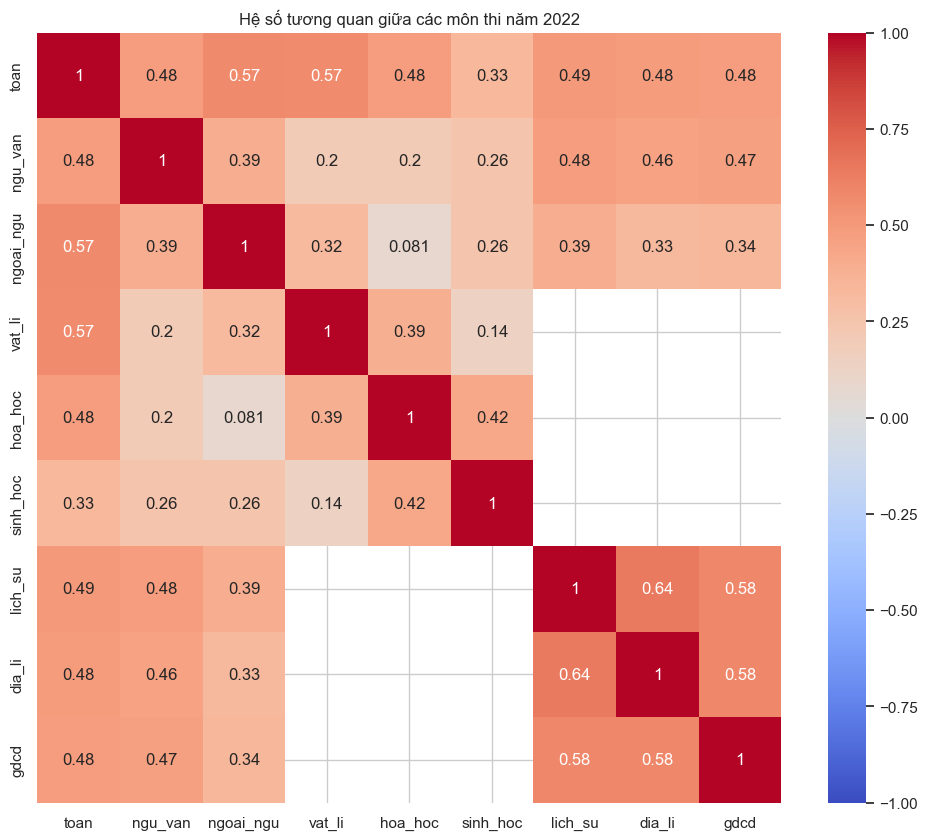

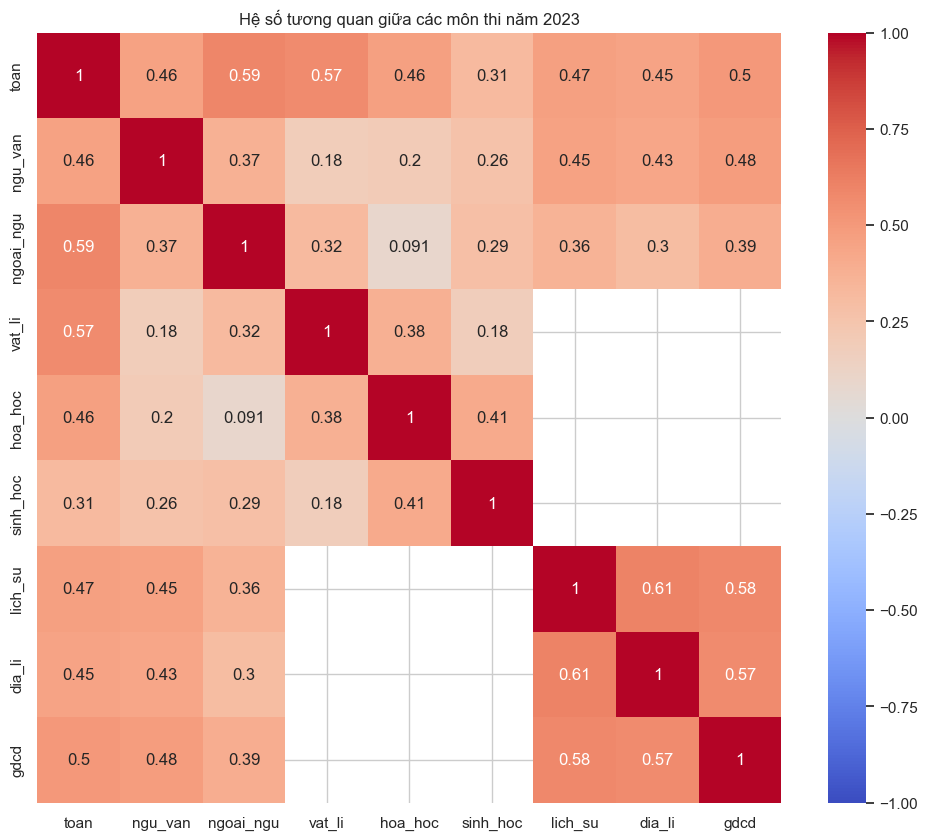

In [71]:
selected_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

corr_2022 = df_2022[selected_columns].corr()
corr_2023 = df_2023[selected_columns].corr()

# Vẽ biểu đồ heatmap cho hệ số tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2022, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2022')
plt.savefig(path_img + '/correlation_heatmap_2022.png')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_2023, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hệ số tương quan giữa các môn thi năm 2023')
plt.savefig(path_img + '/correlation_heatmap_2023.png')
plt.show()

### So sánh phân phối điểm theo các nhóm (cao, trung bình, thấp)

In [72]:
def categorize_scores(df):
    for subject in subjects:
        df[f'{subject}_group'] = pd.qcut(df[subject], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores(df_2022)
df_2023 = categorize_scores(df_2023)

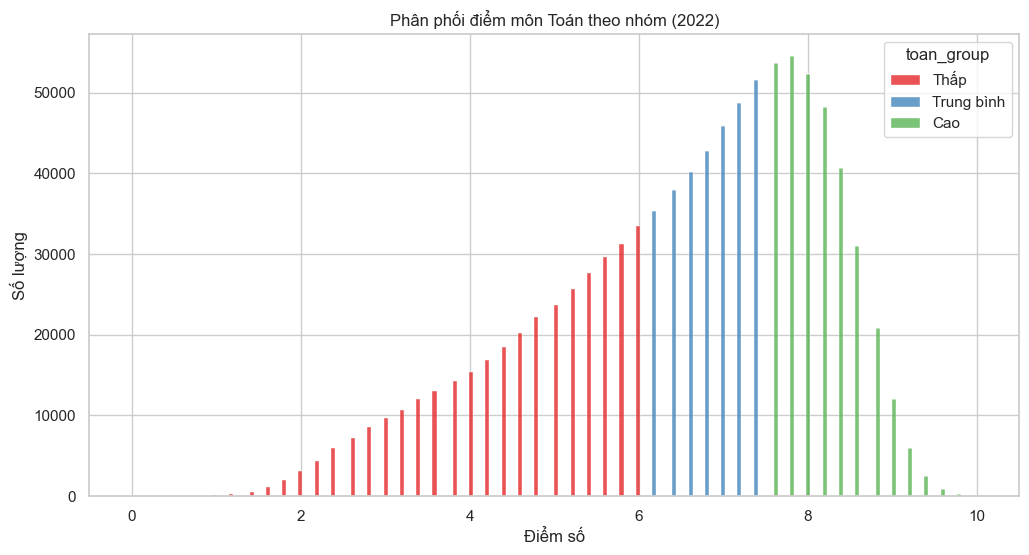

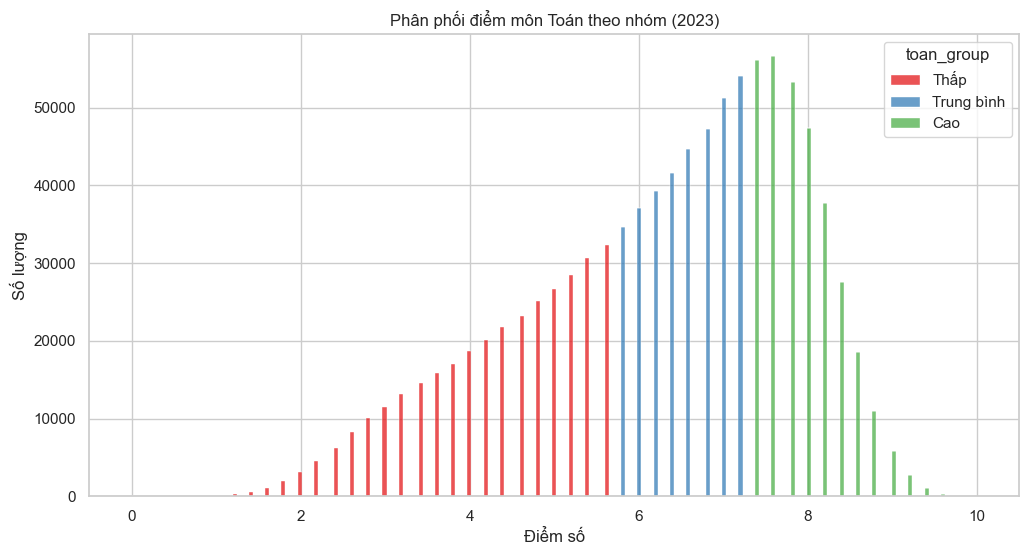

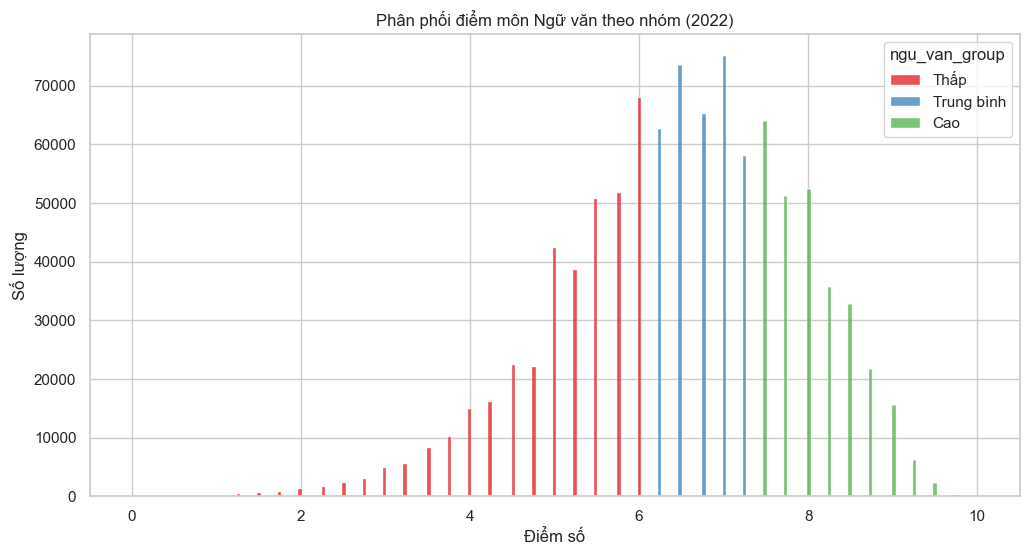

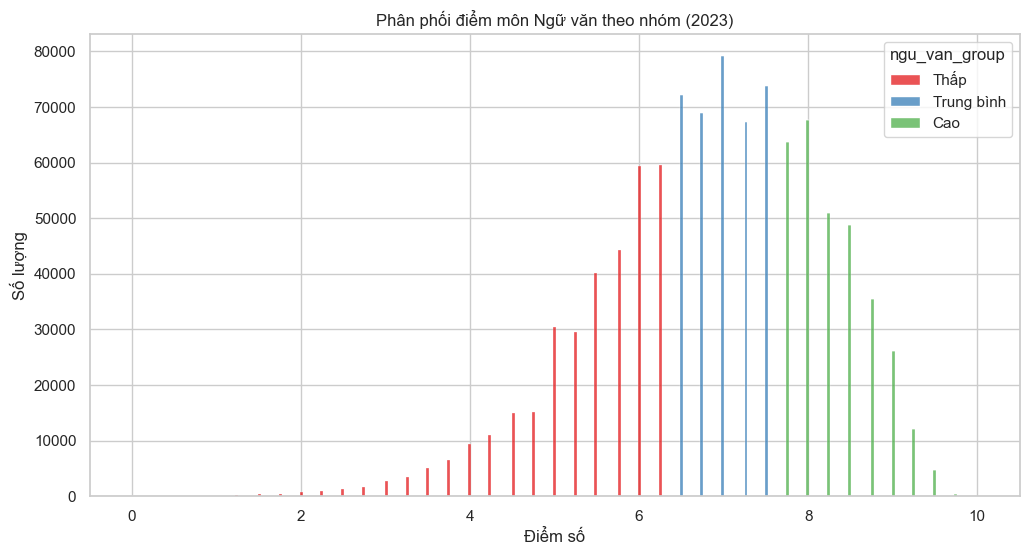

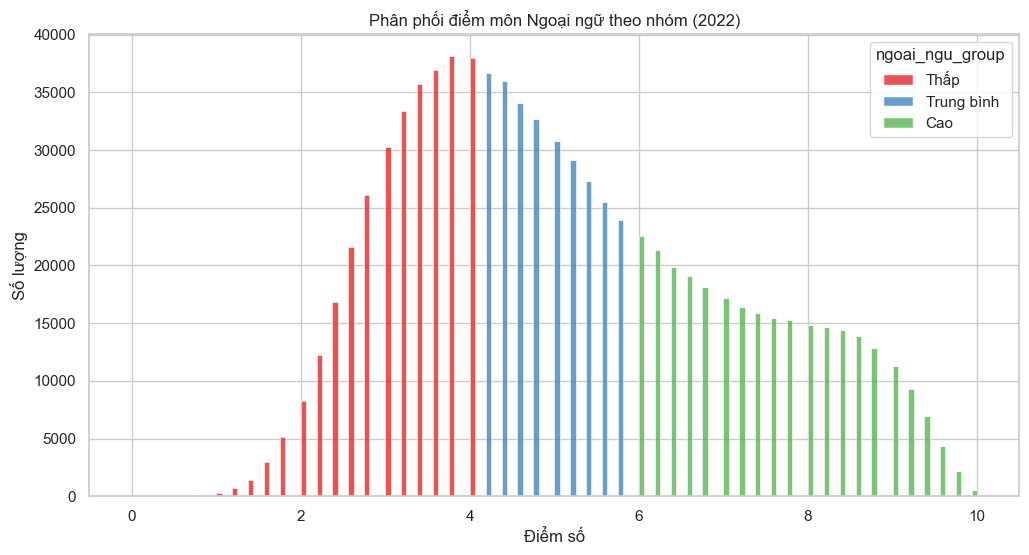

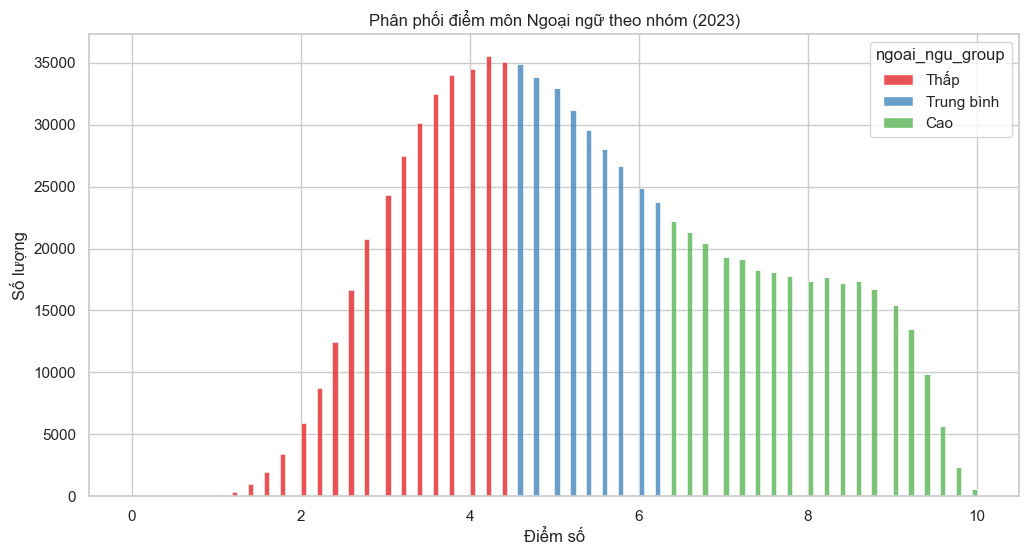

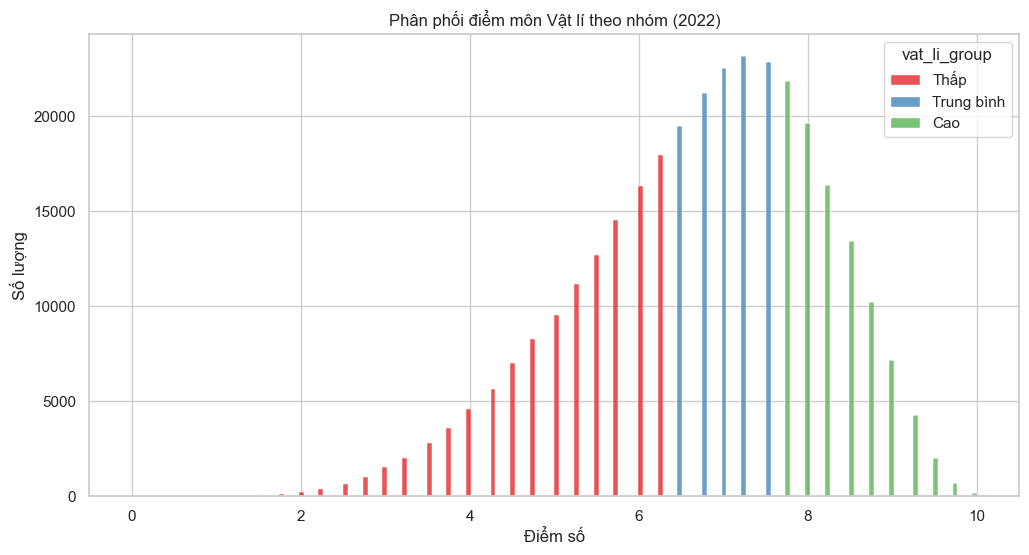

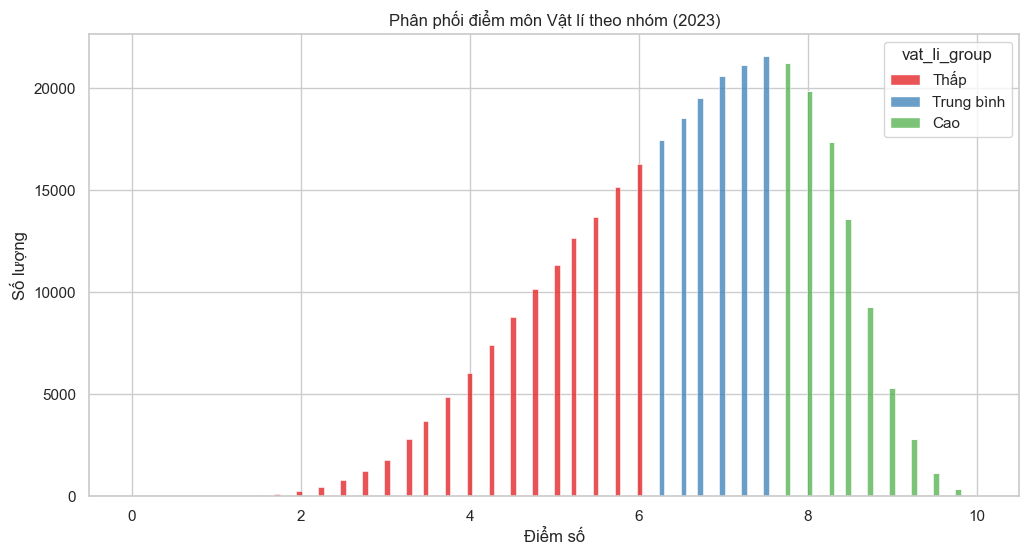

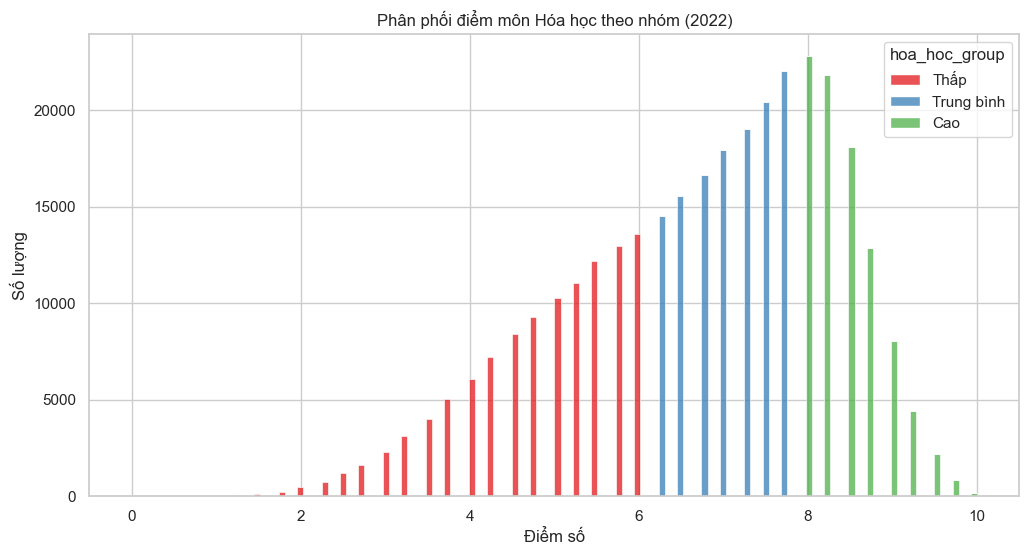

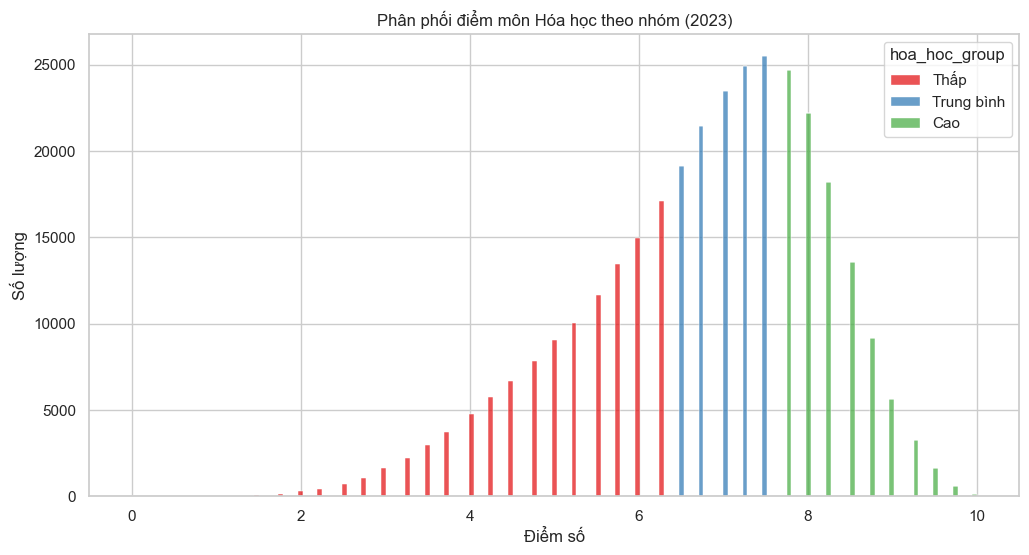

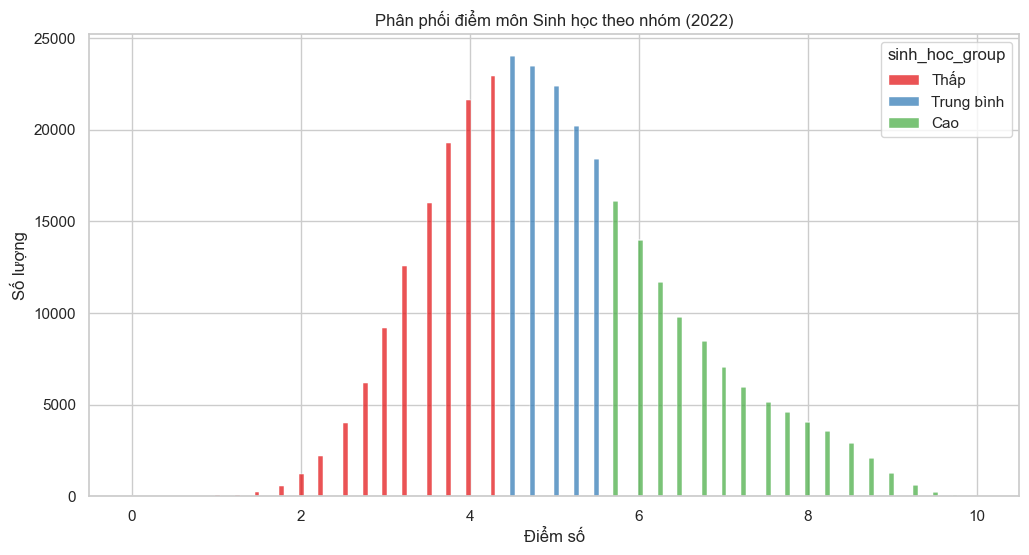

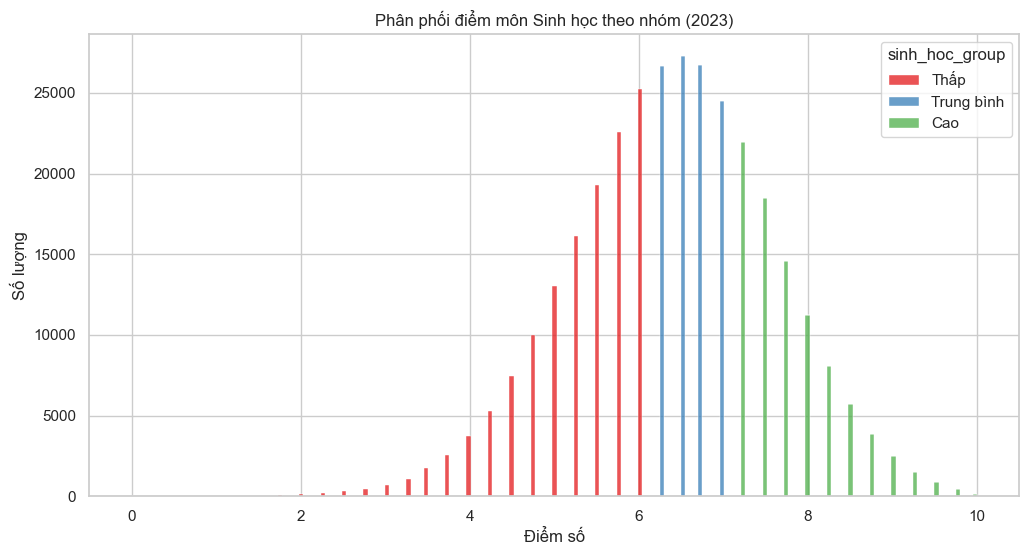

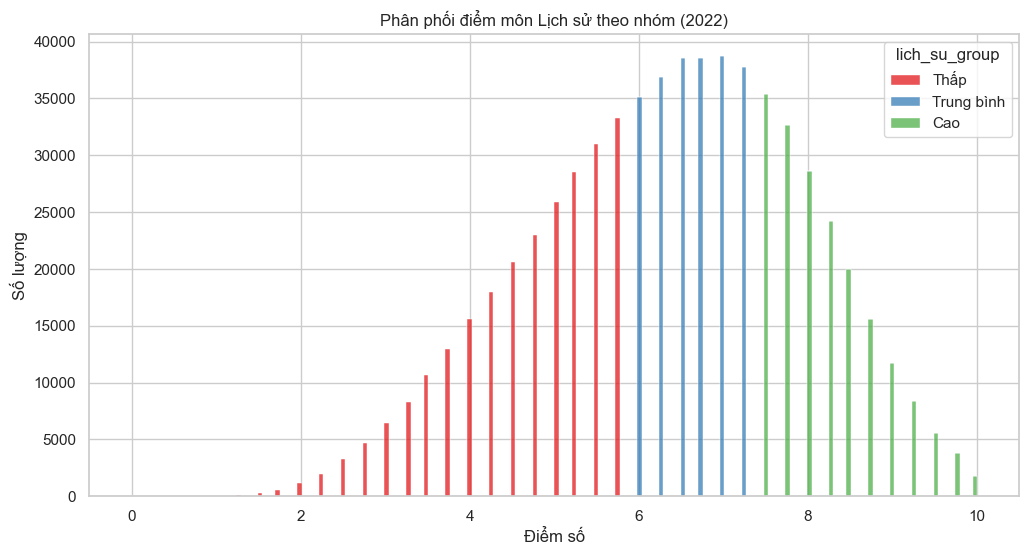

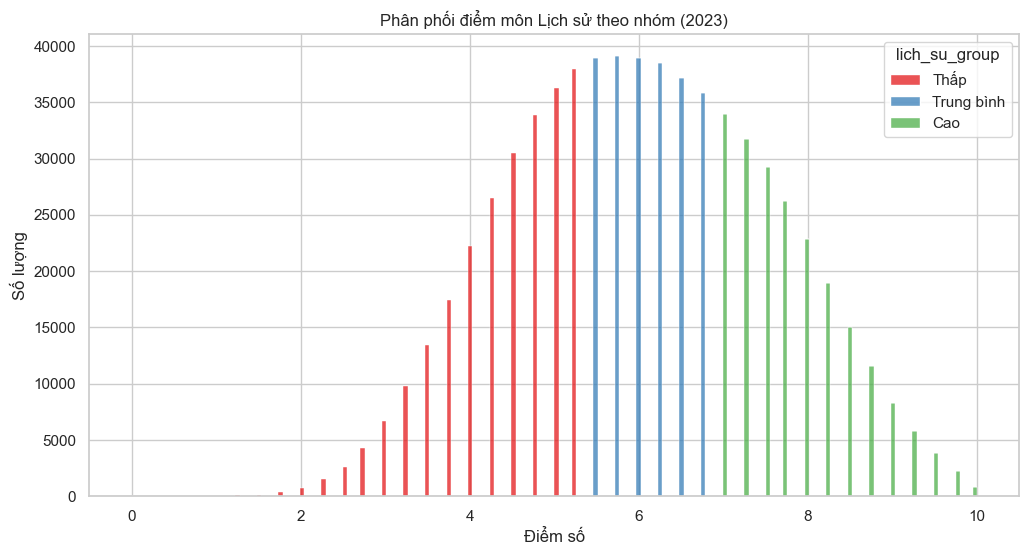

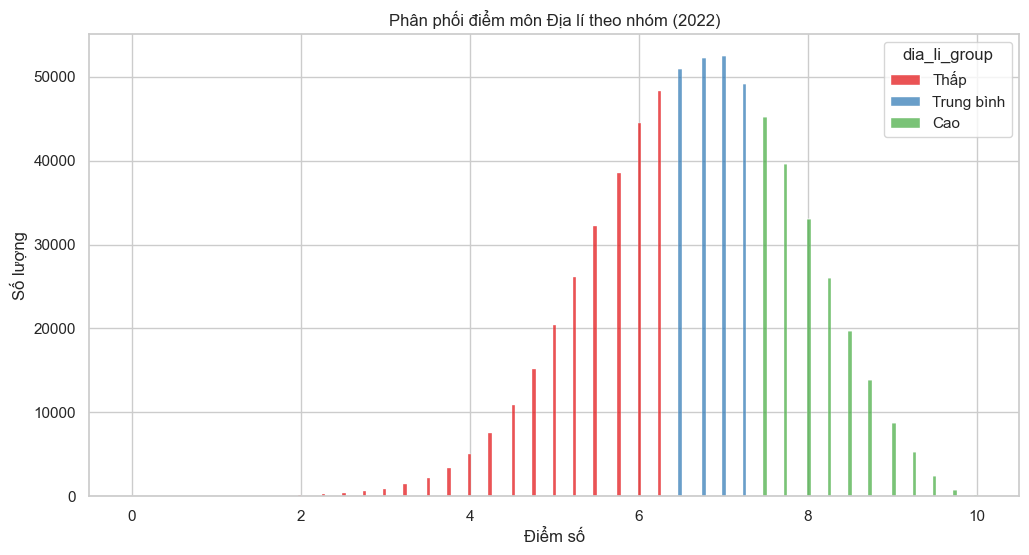

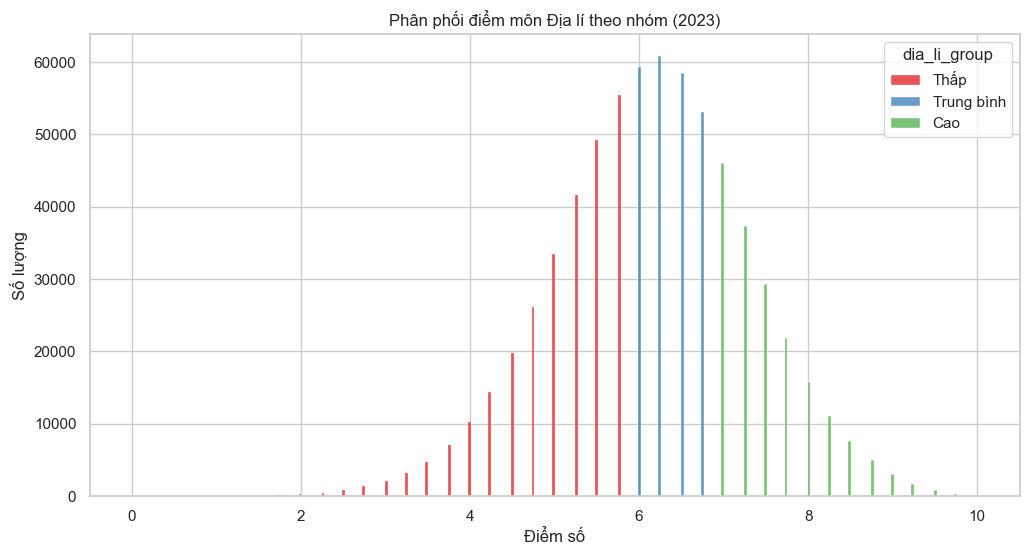

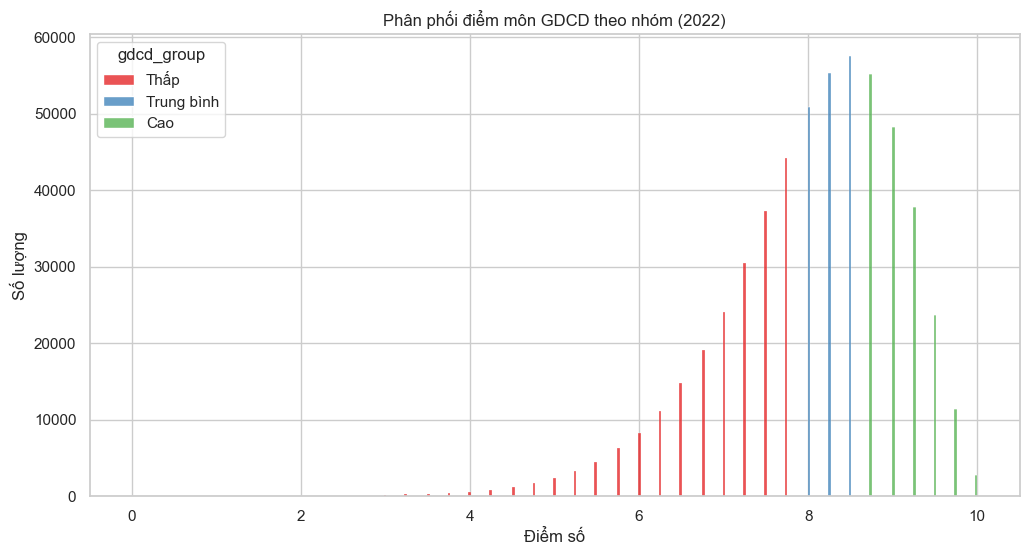

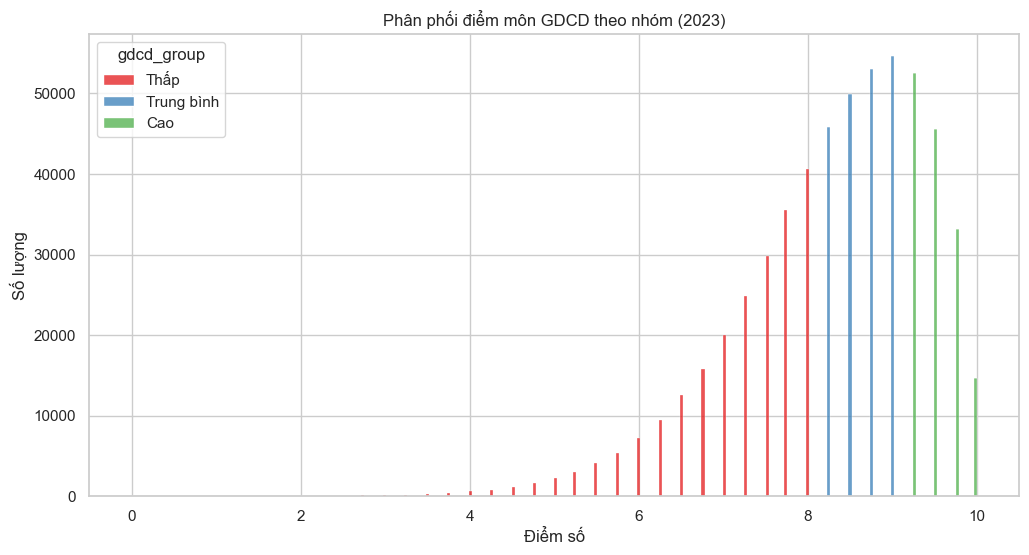

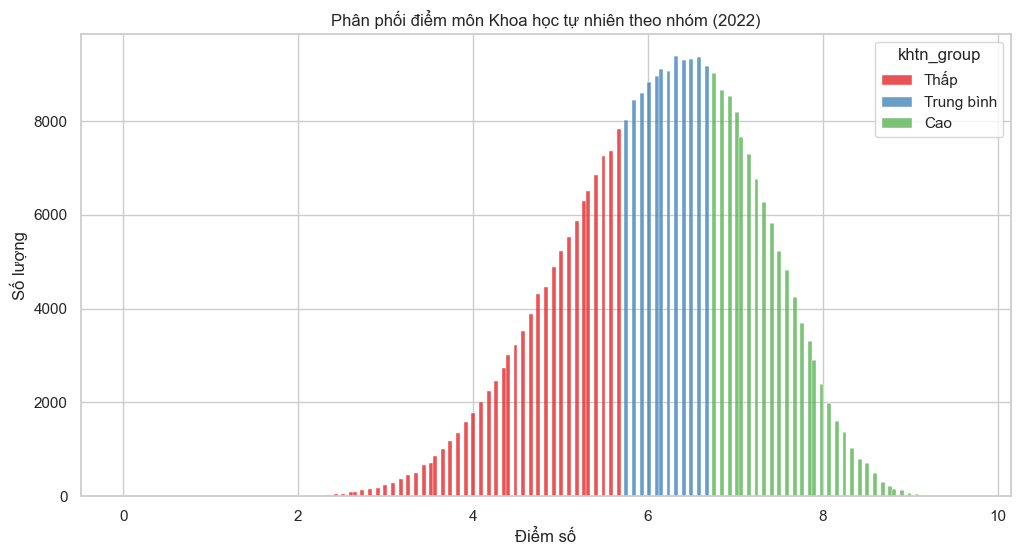

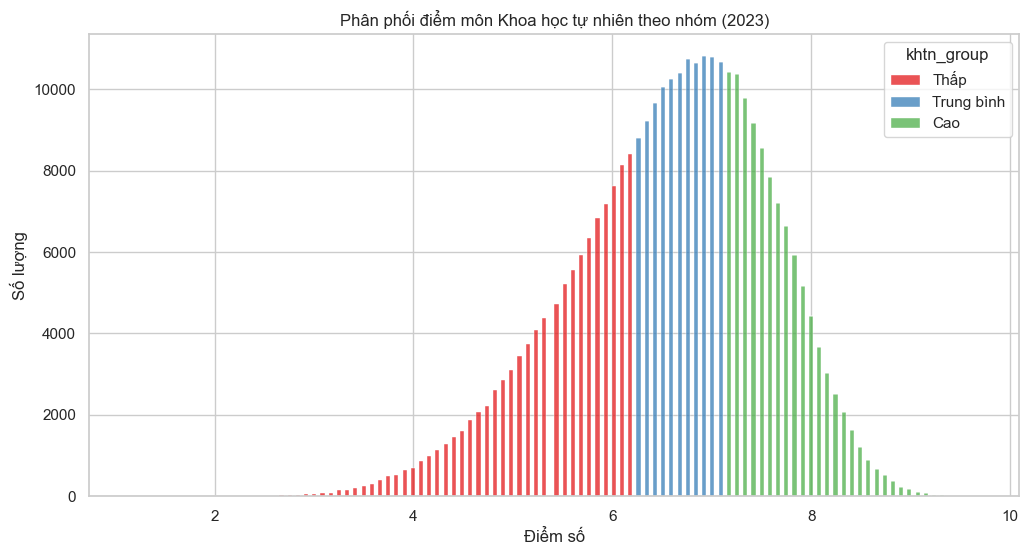

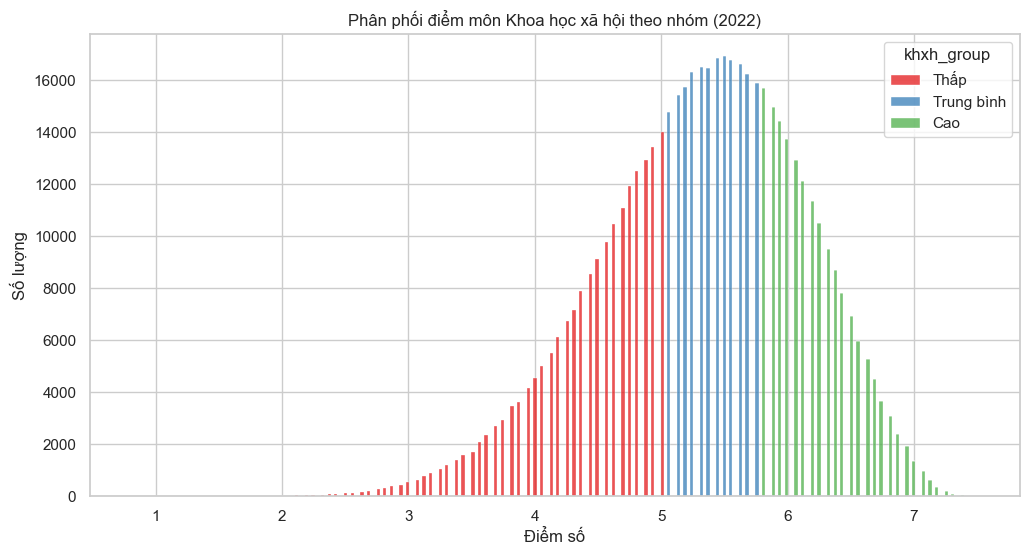

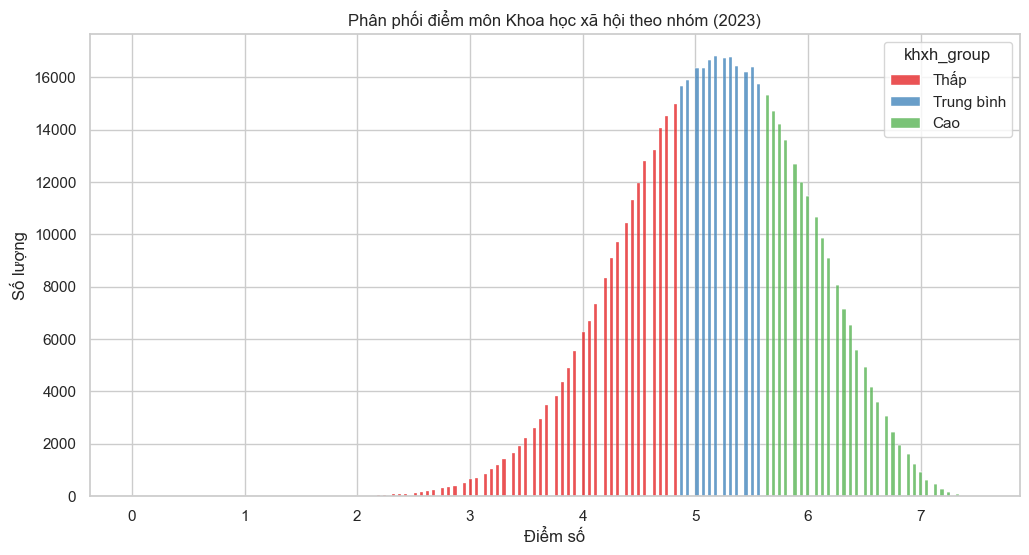

In [73]:
# Vẽ biểu đồ phân phối điểm theo các nhóm

for subject in subjects:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=subject, hue=f'{subject}_group', multiple="stack", palette='Set1')
    plt.title(f'Phân phối điểm môn {subject_map[subject]} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{subject}_2023.png')
    plt.show()

### So sánh phân phối điểm tổ hợp môn theo các nhóm (cao, trung bình, thấp)

In [74]:
def categorize_scores_combo(df):
    for combo in combinations.keys():
        df[f'{combo}_group'] = pd.qcut(df[combo], 3, labels=['Thấp', 'Trung bình', 'Cao'])
    return df

df_2022 = categorize_scores_combo(df_2022)
df_2023 = categorize_scores_combo(df_2023)

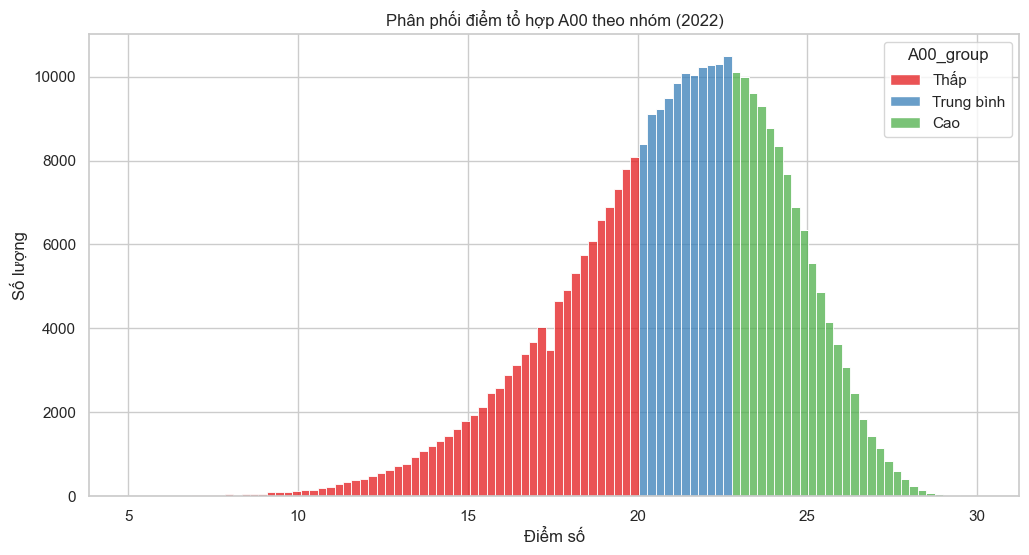

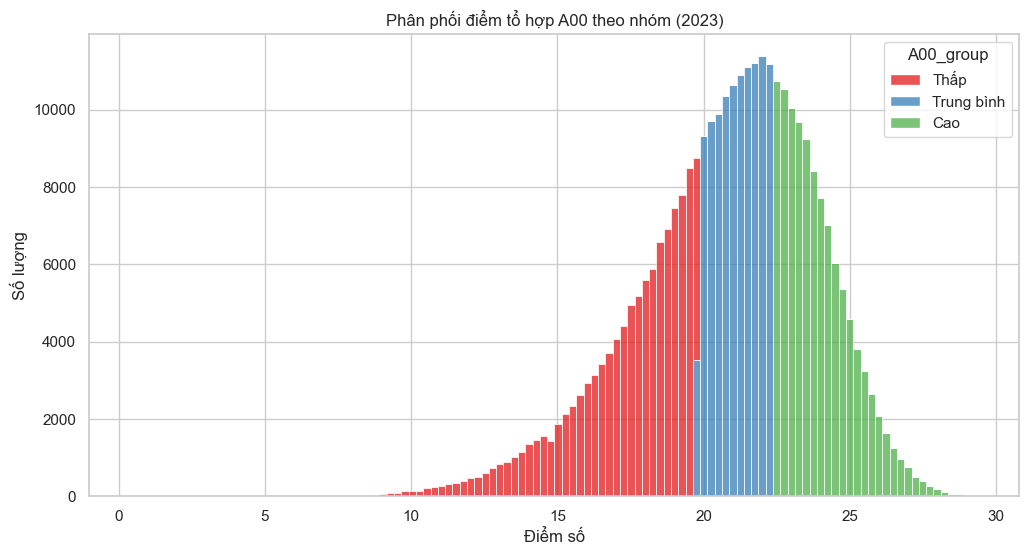

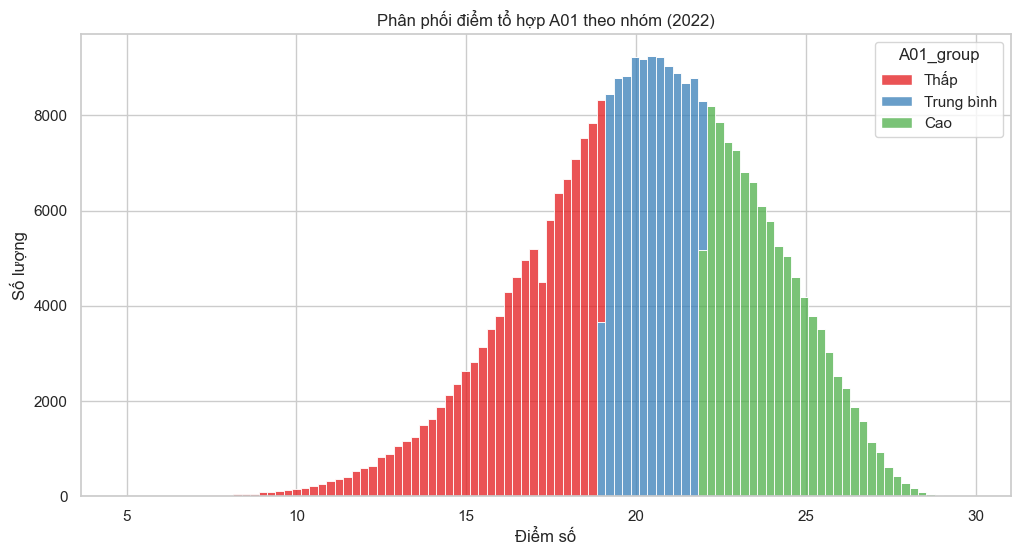

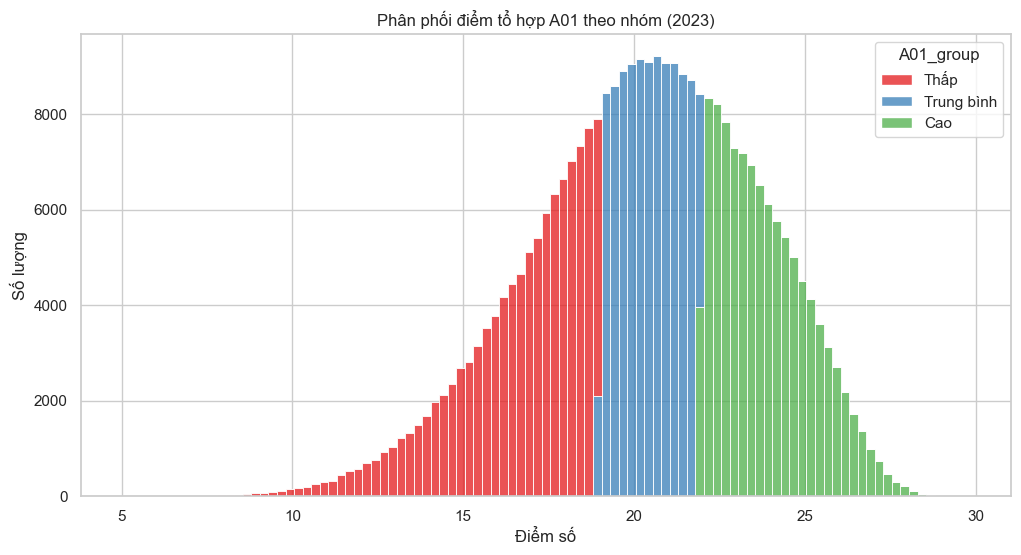

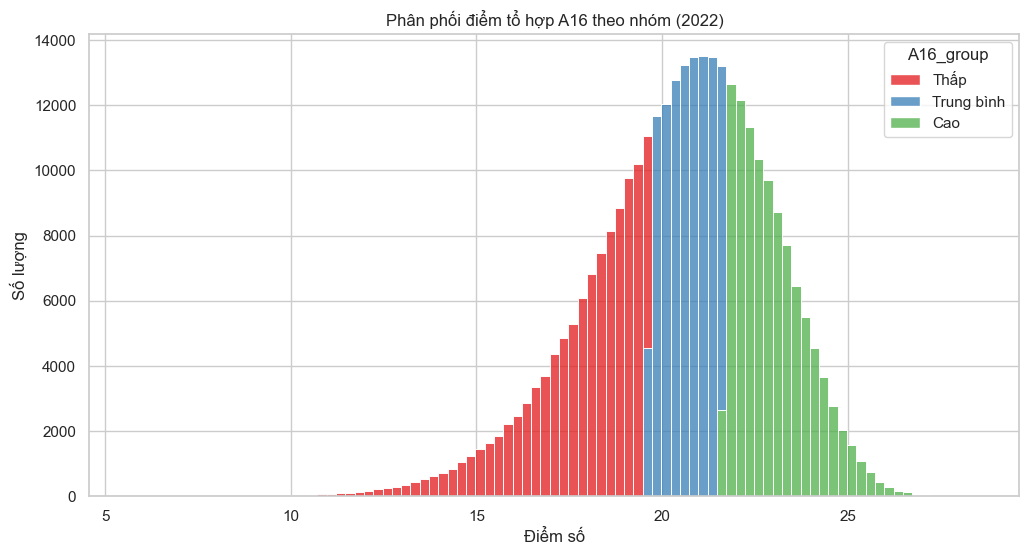

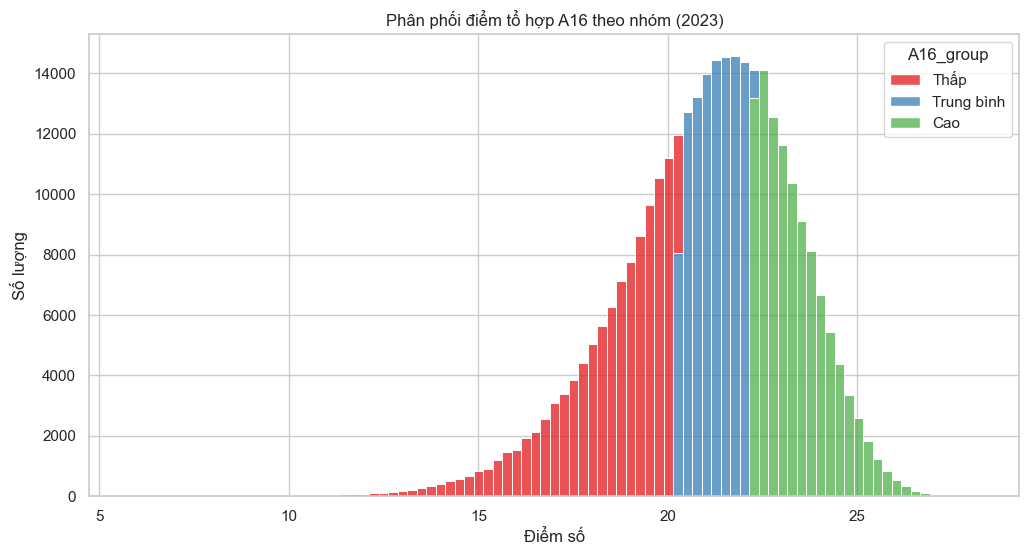

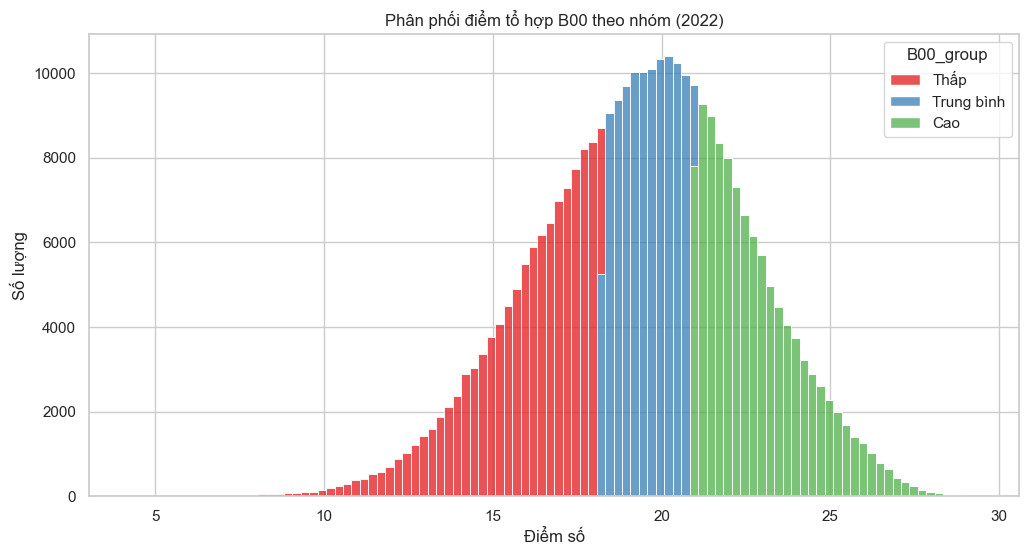

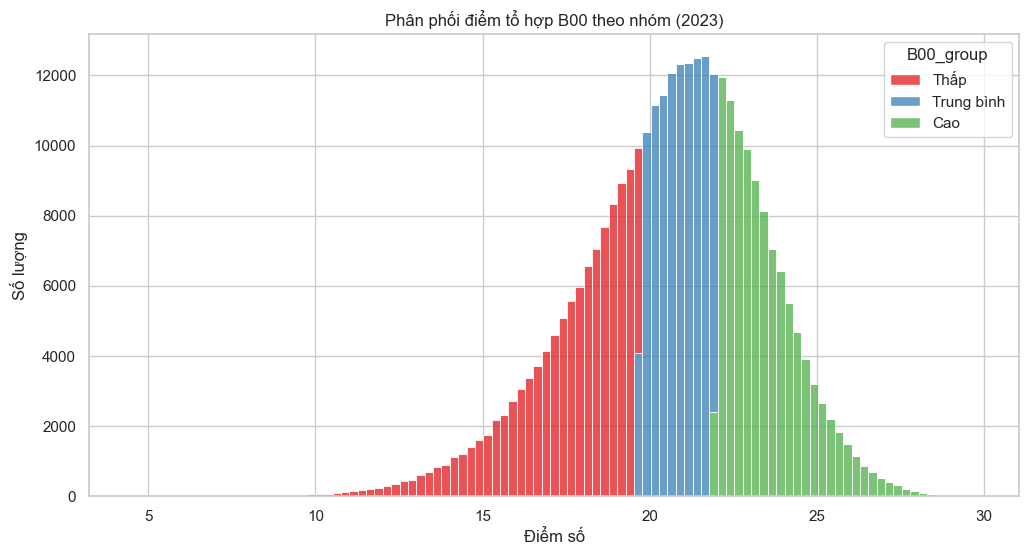

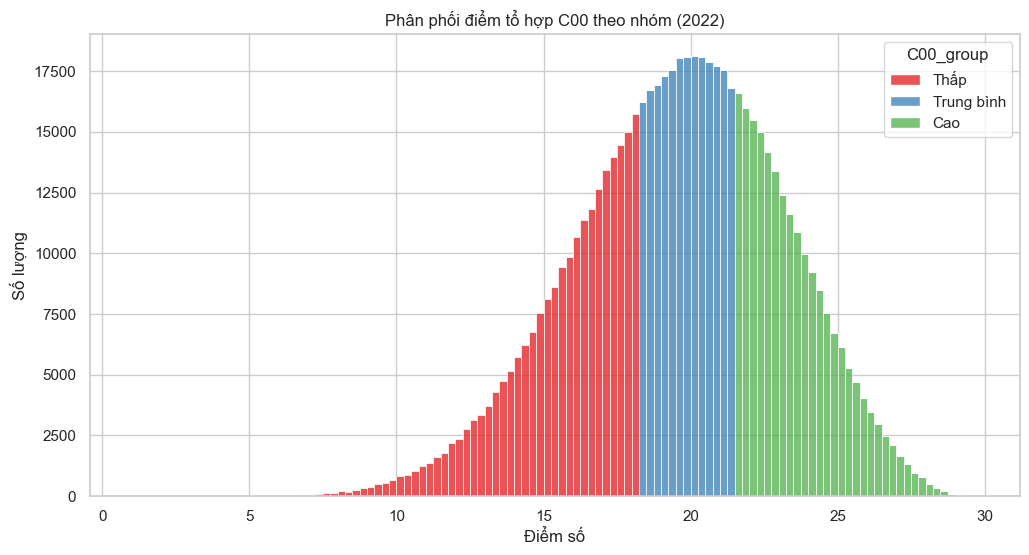

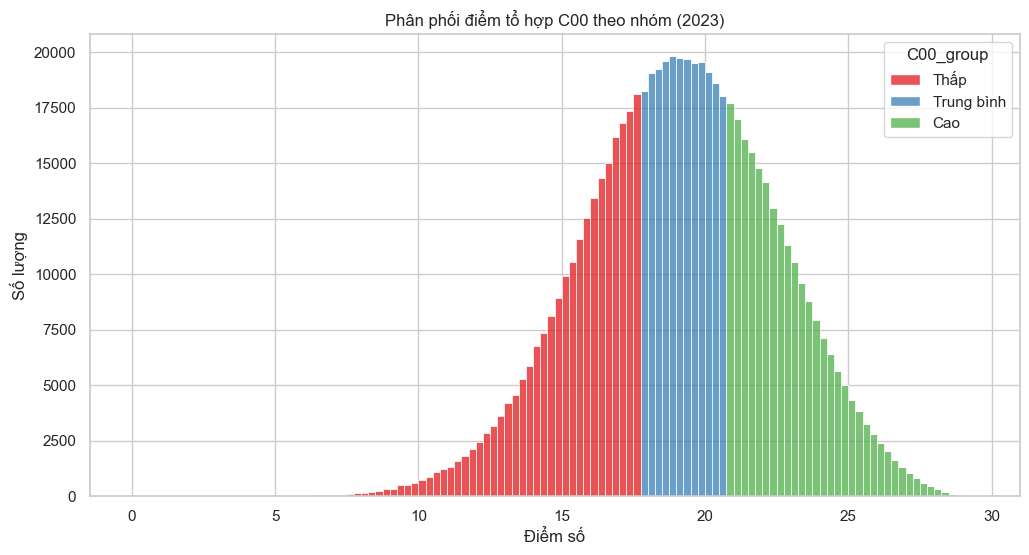

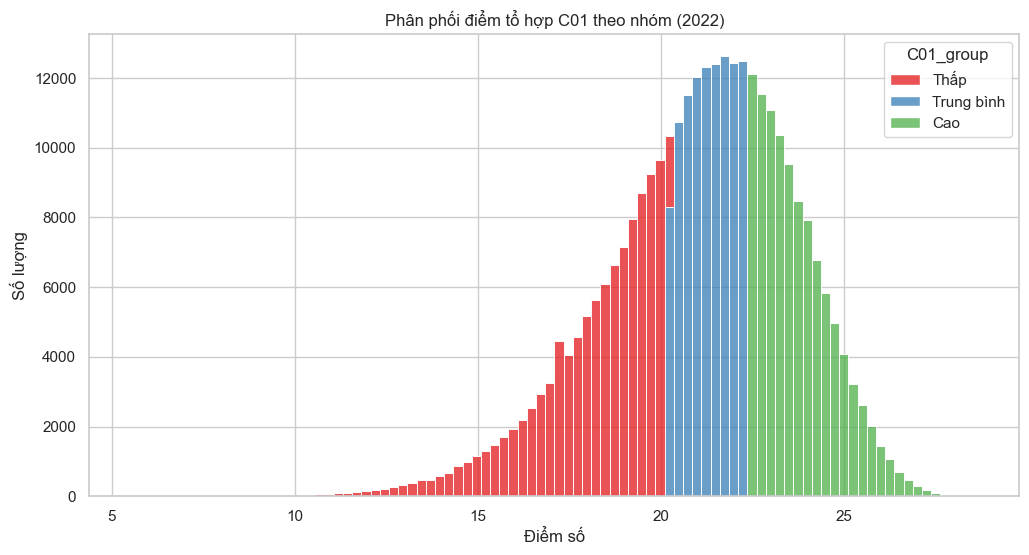

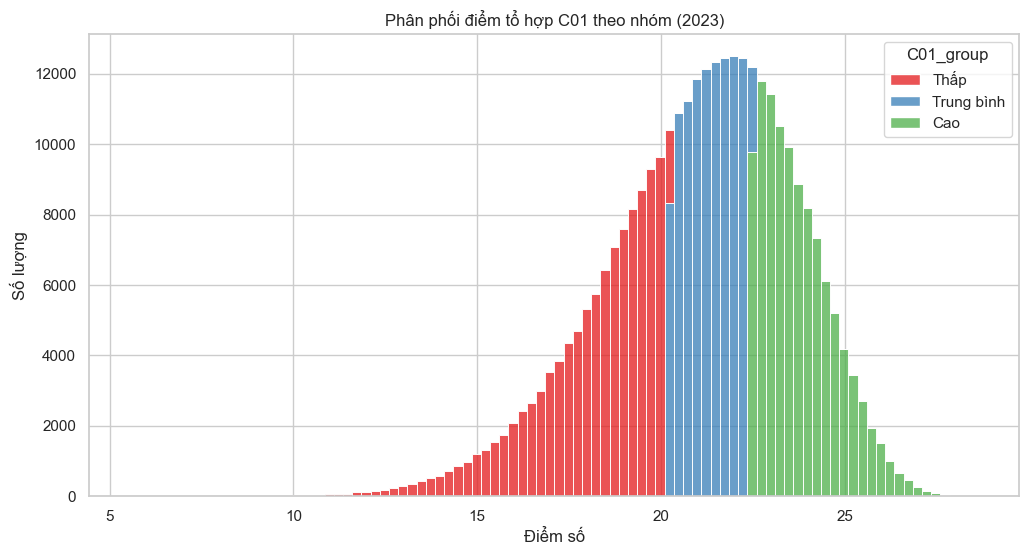

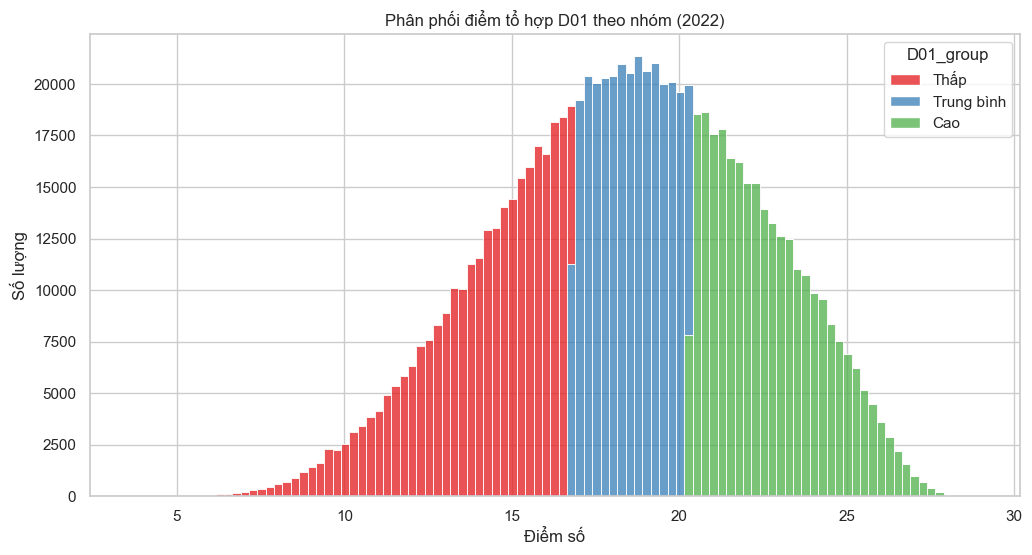

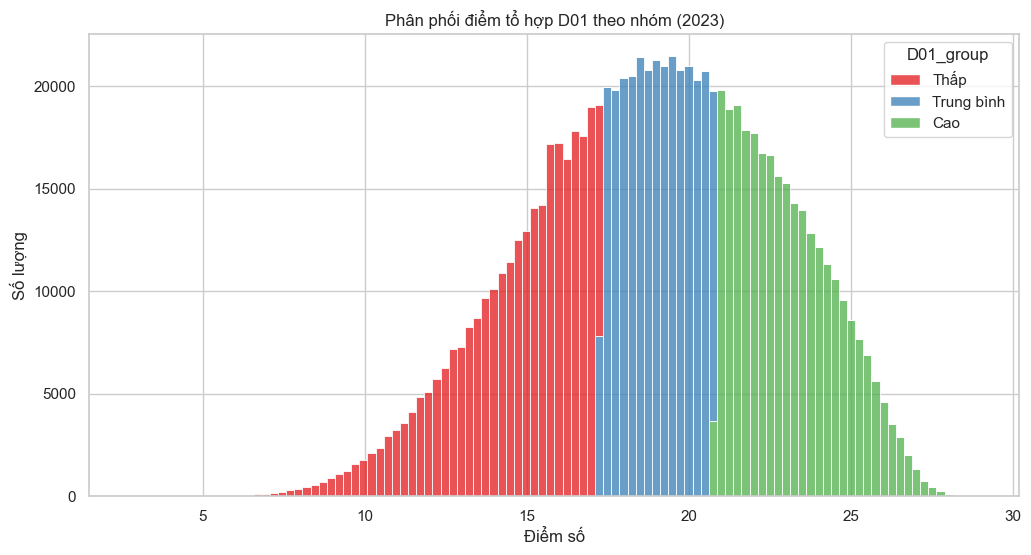

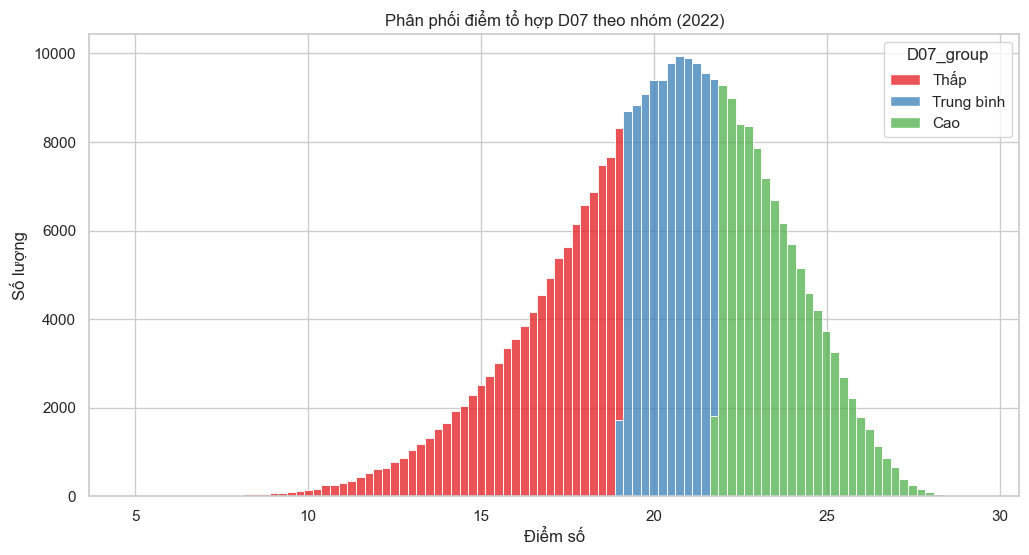

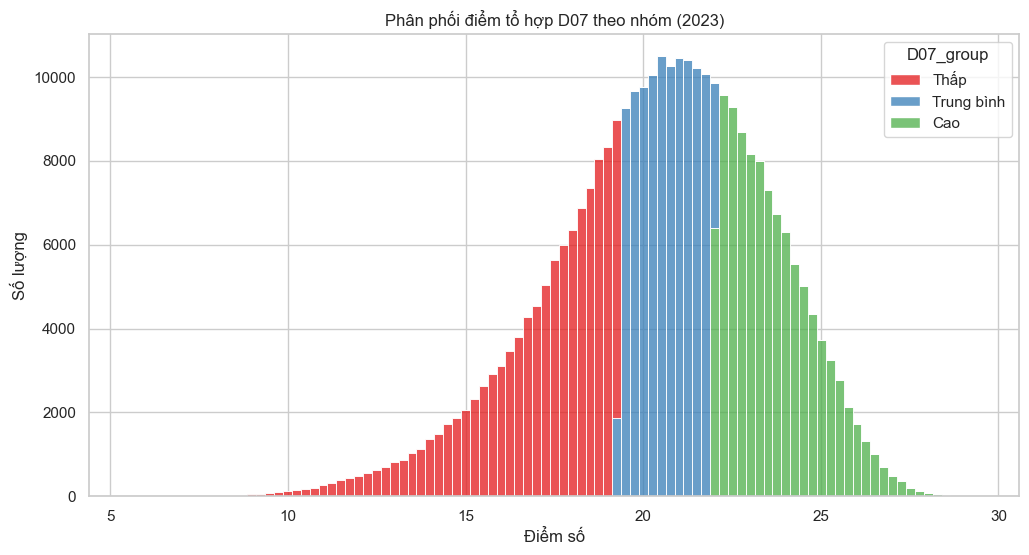

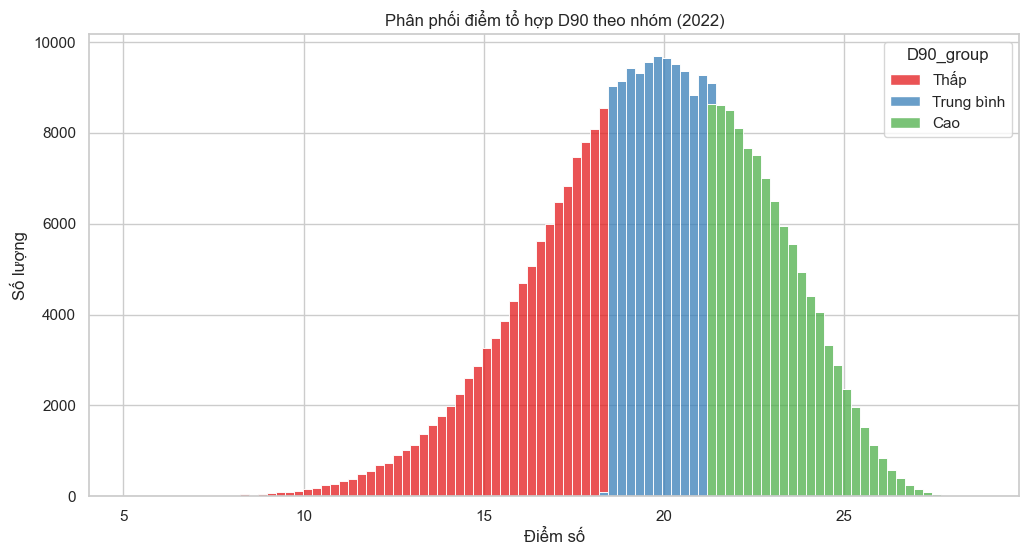

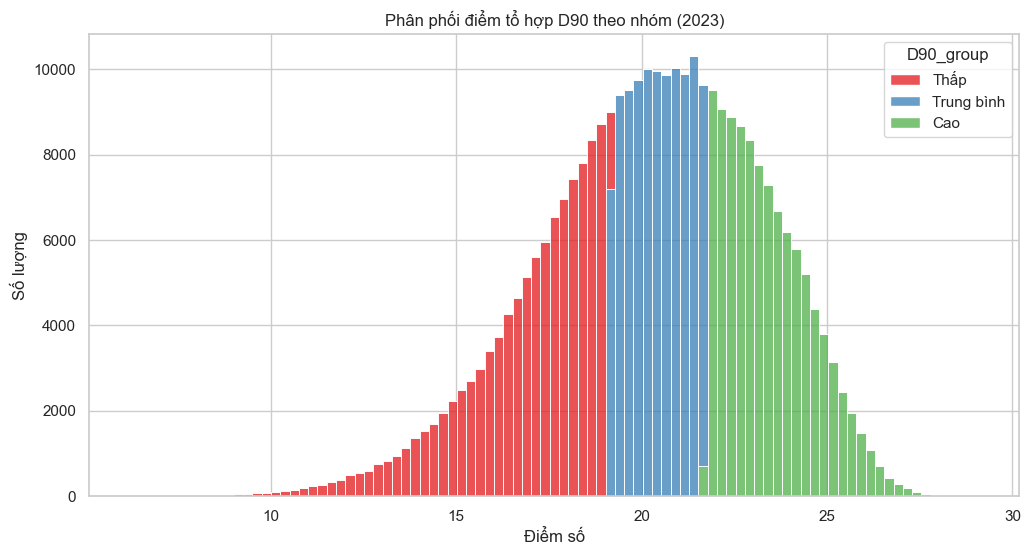

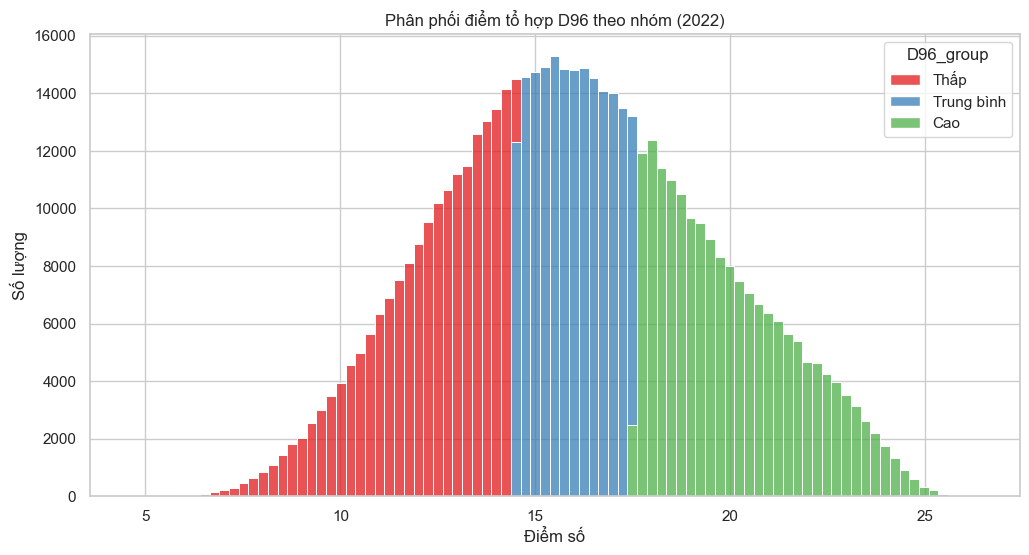

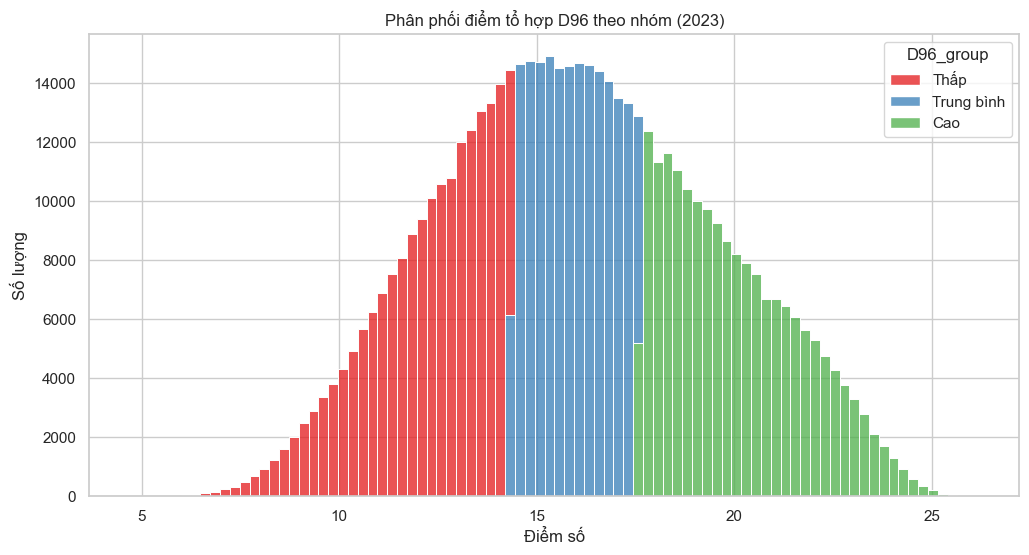

In [75]:


for combo in combinations.keys():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2022, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2022)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2022.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_2023, x=combo, hue=f'{combo}_group', multiple="stack", palette='Set1', binwidth=0.25)
    plt.title(f'Phân phối điểm tổ hợp {combo} theo nhóm (2023)')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng')
    plt.savefig(f'{path_img}/grouped_distribution_{combo}_2023.png')
    plt.show()

### Thống kê cho các tỉnh thành

In [76]:
# Hàm để tính các thông tin thống kê về tỉnh thành cho các môn thi
def calculate_subject_statistics(df, year):
    stats_list = []
    for province_code, province_info in province_map.items():
        province_df = df[df['Province'] == province_info['name']]
        for subject in subjects:
            subject_scores = province_df[subject].dropna()
            stats = {
                'Province': province_info['name'],
                'Region': province_info['region'], 
                'Year': year,
                'Subject': subject_map[subject],
                'Number of Students': len(subject_scores),
                'Average Score': subject_scores.mean(),
                'Number of Scores <= 1': (subject_scores <= 1).sum(),
                'Number of Scores < 5': (subject_scores < 5).sum(),
                'Number of Scores >= 9': (subject_scores >= 9).sum(),
                'Max Score': subject_scores.max(),
                'Min Score': subject_scores.min(),
                'Longitude': province_info['longitude'],
                'Latitude': province_info['latitude']
            }
            stats_list.append(stats)
    return pd.DataFrame(stats_list)

# Hàm để tính các thông tin thống kê về tỉnh thành cho các tổ hợp môn thi
def calculate_combination_statistics(df, year):
    stats_list = []
    for province_code, province_info in province_map.items():
        province_df = df[df['Province'] == province_info['name']]
        for combo, combo_subjects in combinations.items():
            combo_scores = province_df[combo].dropna()
            stats = {
                'Province': province_info['name'],
                'Region': province_info['region'],
                'Year': year,
                'Combination': combo,
                'Number of Students': len(combo_scores),
                'Average Score': combo_scores.mean(),
                'Number of Scores < 15': (combo_scores < 15).sum(),
                'Number of Scores < 20': (combo_scores < 20).sum(),
                'Number of Scores >= 27': (combo_scores >= 27).sum(),
                'Max Score': combo_scores.max(),
                'Min Score': combo_scores.min(),
                'Longitude': province_info['longitude'],
                'Latitude': province_info['latitude']
            }
            stats_list.append(stats)
    return pd.DataFrame(stats_list)

# Tính các thông tin thống kê cho từng tỉnh thành cho các môn thi và tổ hợp môn thi
subject_stats_2022 = calculate_subject_statistics(df_2022, 2022)
subject_stats_2023 = calculate_subject_statistics(df_2023, 2023)
combination_stats_2022 = calculate_combination_statistics(df_2022, 2022)
combination_stats_2023 = calculate_combination_statistics(df_2023, 2023)

# Gộp dữ liệu của hai năm
subject_stats_combined = pd.concat([subject_stats_2022, subject_stats_2023])
combination_stats_combined = pd.concat([combination_stats_2022, combination_stats_2023])

# Sắp xếp lại các cột theo thứ tự
subject_stats_combined = subject_stats_combined[['Year', 'Region', 'Province', 'Subject', 'Number of Students', 'Average Score', 'Number of Scores <= 1', 'Number of Scores < 5', 'Number of Scores >= 9', 'Max Score', 'Min Score', 'Longitude', 'Latitude']]
combination_stats_combined = combination_stats_combined[['Year', 'Region', 'Province', 'Combination', 'Number of Students', 'Average Score', 'Number of Scores < 15', 'Number of Scores < 20', 'Number of Scores >= 27', 'Max Score', 'Min Score', 'Longitude', 'Latitude']]

# Đổi tên cột sang tiếng Việt
subject_stats_combined.columns = ['Năm', 'Khu vực', 'Tỉnh/Thành phố', 'Môn', 'Số lượng thí sinh', 'Điểm trung bình', 'Số lượng điểm <= 1', 'Số lượng điểm < 5', 'Số lượng điểm >= 9', 'Điểm cao nhất', 'Điểm thấp nhất', 'Kinh độ', 'Vĩ độ']
combination_stats_combined.columns = ['Năm', 'Khu vực', 'Tỉnh/Thành phố', 'Tổ hợp', 'Số lượng thí sinh', 'Điểm trung bình', 'Số lượng điểm < 15', 'Số lượng điểm < 20', 'Số lượng điểm >= 27', 'Điểm cao nhất', 'Điểm thấp nhất', 'Kinh độ', 'Vĩ độ']

# Lưu kết quả vào các file Excel riêng biệt
subject_stats_combined.to_excel(path_processed + '/subject_statistics.xlsx', index=False, engine='openpyxl', sheet_name='Thống kê môn')
combination_stats_combined.to_excel(path_processed + '/combination_statistics.xlsx', index=False, engine='openpyxl', sheet_name='Thống kê tổ hợp')

In [77]:
subject_stats_combined.head()

,Năm,Khu vực,Tỉnh/Thành phố,Môn,Số lượng thí sinh,Điểm trung bình,Số lượng điểm <= 1,Số lượng điểm < 5,Số lượng điểm >= 9,Điểm cao nhất,Điểm thấp nhất,Kinh độ,Vĩ độ
0,2022,Bắc,Hà Nội,Toán,95769,6.765761,10,15349,3624,10.00,0.0,105.8342,21.0278
1,2022,Bắc,Hà Nội,Ngữ văn,95577,6.652526,24,10699,3134,9.75,0.0,105.8342,21.0278
2,2022,Bắc,Hà Nội,Ngoại ngữ,81922,5.831596,59,31966,7651,10.00,0.0,105.8342,21.0278
3,2022,Bắc,Hà Nội,Vật lí,26137,6.840207,5,3655,1970,10.00,0.0,105.8342,21.0278
4,2022,Bắc,Hà Nội,Hóa học,26169,6.310386,8,7131,1547,10.00,0.0,105.8342,21.0278


In [78]:
combination_stats_combined.head()

,Năm,Khu vực,Tỉnh/Thành phố,Tổ hợp,Số lượng thí sinh,Điểm trung bình,Số lượng điểm < 15,Số lượng điểm < 20,Số lượng điểm >= 27,Điểm cao nhất,Điểm thấp nhất,Kinh độ,Vĩ độ
0,2022,Bắc,Hà Nội,A00,25914,21.128568,1145,8973,525,30.000000,5.900000,105.8342,21.0278
1,2022,Bắc,Hà Nội,A01,24435,21.293820,1212,8217,631,29.800000,4.900000,105.8342,21.0278
2,2022,Bắc,Hà Nội,A16,25031,20.371840,417,10124,0,26.816667,7.483333,105.8342,21.0278
3,2022,Bắc,Hà Nội,B00,25692,18.950485,2895,15733,88,29.350000,5.650000,105.8342,21.0278
4,2022,Bắc,Hà Nội,C00,69152,19.745644,6308,33342,424,29.000000,5.250000,105.8342,21.0278
